**OBJECTIVE:** 
<br>*The objective of this data analysis project is to gain insights into the ecommerce order data of a fictional company. We will analyze customer information, product details, and order history to derive meaningful conclusions that can aid business decision-making.*

In [560]:
#Python code for connecting to MySQL database using mysql-connector-python
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [20]:
# Replace 'your_username', 'your_password', 'your_host', and 'your_database' with actual credentials
connection = mysql.connector.connect(
user='root',
password='Ban@16/11/23',
host='localhost',
database='ecommerce'
)

In [21]:
# Create a cursor object to execute SQL queries
cursor = connection.cursor()

In [23]:
# Create a cursor object to execute SQL queries
cursor = connection.cursor()

# Query data from the 'customer' table
cursor.execute('SELECT * FROM customer')
#After fetching data from the database we are storing it into Pandas DataFrame
cust_df = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

# Query data from the 'product' table
cursor.execute('SELECT * FROM product')
prod_df = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

# Query data from the 'order_details' table
cursor.execute('SELECT * FROM order_details')
ord_df = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

cursor.close()
connection.close()

**DATA CLEANING:**

In [31]:
#printing first 5 records from each table
cust_df.head()

,customer_id,name,city,email,phone_no,address,pin_code
0,C1001,Steve,Tokyo,steve@gmail.com,4567897652,f.g.road,99
1,C1002,john,Sydney,john@gmail.com,9987234567,k.c.road,75001
2,C1003,Peter,Kanagawa,peter.parker@mail.com,9969834567,2F Ikenobecho,171
3,C1004,Jackson,Tokyo,Jackson@gmail.com,7765834567,"24-2, Sendagaya",8429
4,C1005,Jack,Lake Buena Vista,Jack@gmail.com,8876345678,1520 E Buena Vista Drive,32830


In [32]:
prod_df.head()

,product_id,product_name,category,sub_category,original_price,selling_price,stock
0,P102,Chair,furniture,Chairs,20000.0,15000.00,10
1,P103,Laptop,Electronics,computer,60000.0,55000.00,50
2,P104,Smartphone,Electronics,phone,45000.0,40000.00,20
3,P105,Blender,Appliance,Electronics,500.0,450.00,10
4,P106,Laptop HP,Electronics,Computers,67200.0,55000.99,50


In [33]:
ord_df.head()

,order_id,customer_id,product_id,quantity,total_price,payment_mode,order_date,order_status
0,3,C1004,P112,1.0,1000.0,COD,2023-11-30,Pending
1,4,C1005,P102,1.0,20000.0,COD,2023-11-30,Pending
2,5,C1005,P102,1.0,20000.0,COD,2023-12-08,Delivered
3,7,C1006,P103,1.0,55000.0,COD,2023-12-15,Delivered
4,8,C1006,P102,1.0,15000.0,COD,2023-12-01,delivered


In [572]:
# Convert 'category' column to lowercase and replace values
prod_df['category'] = prod_df['category'].replace('furniture', 'Furniture')

# Now prod_df has updated values in the 'category' column
print(prod_df)

   product_id    product_name     category sub_category  original_price  \
5        P107  Samsung Galaxy  electronics      Mobiles        60000.99   
23       P125      Smartwatch  electronics    Wearables        15000.00   
1        P103          Laptop  electronics     computer        60000.00   
4        P106       Laptop HP  electronics    Computers        67200.00   
17       P119       Desk Lamp    Furniture        Lamps         3000.00   
..        ...             ...          ...          ...             ...   
46       P148          Tablet  electronics    Computers        30000.00   
39       P141         Printer  electronics    Computers        12000.00   
10       P112           chair    Furniture       chairs         1000.00   
3        P105         Blender    appliance  Electronics          500.00   
30       P132        Sofa Set    Furniture    Furniture        50000.00   

    selling_price  stock  
5        49000.99    100  
23       12000.00     50  
1        55000.00 

In [419]:
# Convert 'category' column to lowercase and replace values
prod_df['category'] = prod_df['category'].str.lower()
prod_df['category'] = prod_df['category'].replace(['chair'], 'Chair')

# Now prod_df has updated values in the 'category' column
print(prod_df)

   product_id    product_name     category sub_category  original_price  \
5        P107  Samsung Galaxy  electronics      Mobiles        60000.99   
4        P106       Laptop HP  electronics    Computers        67200.00   
23       P125      Smartwatch  electronics    Wearables        15000.00   
1        P103          Laptop  electronics     computer        60000.00   
17       P119       Desk Lamp    furniture        Lamps         3000.00   
..        ...             ...          ...          ...             ...   
46       P148          Tablet  electronics    Computers        30000.00   
39       P141         Printer  electronics    Computers        12000.00   
10       P112           chair    furniture       chairs         1000.00   
3        P105         Blender    appliance  Electronics          500.00   
30       P132        Sofa Set    furniture    Furniture        50000.00   

    selling_price  stock  
5        49000.99    100  
4        55000.99     50  
23       12000.00 

In [567]:
#Checking and printing the null values of cust_df 
print(cust_df.isnull().sum(),'\n')

customer_id     0
name            0
city            0
email           0
phone_no        0
address         0
pin_code        0
email_domain    0
dtype: int64 



In [568]:
#Checking and printing the null values of prod_df 
print(prod_df.isnull().sum(),'\n')

product_id        0
product_name      0
category          0
sub_category      0
original_price    0
selling_price     0
stock             0
dtype: int64 



In [569]:
#Checking and printing the null values of ord_df 
print(ord_df.isnull().sum(),'\n')

order_id        0
customer_id     0
product_id      0
quantity        0
total_price     0
payment_mode    0
order_date      0
order_status    0
order_month     0
dtype: int64 



In [570]:
#Checking and printing the duplicated values of cust_df 
print(cust_df.duplicated().sum())

0


In [514]:
#Checking and printing the duplicated values of prod_df 
print(prod_df.duplicated().sum())

0


In [515]:
#Checking and printing the duplicated values of ord_df 
print(ord_df.duplicated().sum())

0


**DATA ANALYSIS AND DATA VISUALISATION:**

In [48]:
#Storing and printing the counts of various pincodes
pincode_distribution=cust_df['pin_code'].value_counts()
print(pincode_distribution)

pin_code
171      14
56789    12
75001     8
32830     7
54321     3
34567     2
12345     2
98766     1
87654     1
21098     1
43210     1
76543     1
67891     1
99        1
13580     1
24681     1
13579     1
24680     1
67890     1
8429      1
98765     1
Name: count, dtype: int64


In [516]:
#Printing the non-null values of email column of cust_df
print(cust_df['email'].notnull().sum())

62


In [517]:
#Printing the non-null values of phone_no column of cust_df
print(cust_df['phone_no'].notnull().sum())

62


In [54]:
print(cust_df[cust_df['email'].isnull() | cust_df['phone_no'].isnull()])

Empty DataFrame
Columns: [customer_id, name, city, email, phone_no, address, pin_code]
Index: []


In [518]:
#Printing the mean of the original_price of prod_df
print(prod_df['original_price'].mean())

21011.49163934426


In [519]:
#Printing the mean of the selling_price of prod_df
print(prod_df['selling_price'].mean())

17774.62262295082


In [520]:
#Printing the prod_df after sorting it according to stock column by descending order
print(prod_df.sort_values(by='stock',ascending=False))

   product_id    product_name     category sub_category  original_price  \
5        P107  Samsung Galaxy  electronics      Mobiles        60000.99   
23       P125      Smartwatch  electronics    Wearables        15000.00   
1        P103          Laptop  electronics     computer        60000.00   
4        P106       Laptop HP  electronics    Computers        67200.00   
17       P119       Desk Lamp    furniture        Lamps         3000.00   
..        ...             ...          ...          ...             ...   
46       P148          Tablet  electronics    Computers        30000.00   
39       P141         Printer  electronics    Computers        12000.00   
10       P112           chair    furniture       chairs         1000.00   
3        P105         Blender    appliance  Electronics          500.00   
30       P132        Sofa Set    furniture    Furniture        50000.00   

    selling_price  stock  
5        49000.99    100  
23       12000.00     50  
1        55000.00 

In [521]:
#Printing the counts of sub_category of prod_df
print(prod_df['sub_category'].value_counts())

sub_category
Electronics      20
Computers         9
Wearables         5
Audio             3
Entertainment     3
Lamps             2
Tablets           2
Chairs            2
Accessories       2
Mobiles           1
Consoles          1
chairs            1
Printers          1
Desks             1
Sofas             1
Cameras           1
Tables            1
phone             1
Photography       1
TVs               1
computer          1
Furniture         1
Name: count, dtype: int64


In [529]:
#Printing the prod_df details within the stock range of 30 to 100
print(prod_df[(prod_df['stock'] >= 30) & (prod_df['stock'] <= 100)])

   product_id    product_name     category sub_category  original_price  \
5        P107  Samsung Galaxy  electronics      Mobiles        60000.99   
4        P106       Laptop HP  electronics    Computers        67200.00   
23       P125      Smartwatch  electronics    Wearables        15000.00   
1        P103          Laptop  electronics     computer        60000.00   
17       P119       Desk Lamp    furniture        Lamps         3000.00   
21       P123  Microwave Oven    appliance  Electronics        10000.00   
9        P111      Television  electronics          TVs        60000.00   
16       P118      Headphones  electronics        Audio         5000.00   
49       P151    Gaming Mouse  electronics    Computers         3000.00   
36       P138   Smart Speaker    appliance  Electronics        18000.00   
20       P122          Tablet  electronics      Tablets        30000.00   
27       P129      Smartwatch  electronics    Wearables        25000.00   
52       P154  Wireless M

In [530]:
#Converting the order_date in datetime format
ord_df['order_date']=pd.to_datetime(ord_df['order_date'])

In [531]:
# Resample the order data to daily frequency based on 'order_date'
# The 'size()' method is then used to calculate the number of orders on each day
print(ord_df.resample('D',on='order_date').size())

order_date
2023-11-23    1
2023-11-24    0
2023-11-25    0
2023-11-26    0
2023-11-27    0
             ..
2024-03-17    1
2024-03-18    1
2024-03-19    1
2024-03-20    1
2024-03-21    1
Freq: D, Length: 120, dtype: int64


In [532]:
# Resample the order data to monthly frequency based on 'order_date'
# The 'size()' method is then used to calculate the number of orders on each month
print(ord_df.resample('M',on='order_date').size())

order_date
2023-11-30     3
2023-12-31    14
2024-01-31    19
2024-02-29    19
2024-03-31    21
Freq: M, dtype: int64


In [533]:
# Resample the order data to yearly frequency based on 'order_date'
# The 'size()' method is then used to calculate the number of orders on each yearly
print(ord_df.resample('Y',on='order_date').size())

order_date
2023-12-31    17
2024-12-31    59
Freq: A-DEC, dtype: int64


In [71]:
print(ord_df.resample('D',on='order_date').size().idxmax())

2023-11-30 00:00:00


In [72]:
print(ord_df.groupby(ord_df['order_date'].dt.hour).size().idxmax())

0


In [534]:
#Printing the mean of the total_price which is grouped by payment_mode
print(ord_df.groupby('payment_mode')['total_price'].mean())

payment_mode
COD       20451.515152
Online    21197.674419
Name: total_price, dtype: float64


In [535]:
#Printing the counts of order_status in ord_df
print(ord_df['order_status'].value_counts())

order_status
Delivered    27
Pending      25
Shipped      16
Cancelled     6
delivered     1
Returned      1
Name: count, dtype: int64


In [536]:
#Printing the first 10 customer_id
print(ord_df['customer_id'].value_counts().head(10))

customer_id
C1013    3
C1009    3
C1010    3
C1005    3
C1003    2
C1008    2
C1006    2
C1011    2
C1014    2
C1015    2
Name: count, dtype: int64


In [82]:
# Identify the most popular products among different customer segments
print(ord_df.merge(cust_df, on='customer_id').groupby('city')['product_id'].value_counts().groupby('city').head(1))

city              product_id
Kanagawa          P103          2
Lake Buena Vista  P102          2
Sydney            P157          1
Tokyo             P127          2
Name: count, dtype: int64


In [561]:
# Analyze the average total price spent by customers from different cities
print(ord_df.merge(cust_df, on='customer_id').groupby('city')['total_price'].sum())

city
Kanagawa            535450.0
Lake Buena Vista    331450.0
Sydney              291000.0
Tokyo               428500.0
Name: total_price, dtype: float64


In [539]:
#Printing the sum of the total_price solumn in ord_df
print(ord_df['total_price'].sum())

1586400.0


In [540]:
#Merging the ord_df and prod_df according to product_id and then calculating the sum of total_price after grouping by category
print(ord_df.merge(prod_df, on='product_id').groupby('category')['total_price'].sum())

category
appliance      327900.0
electronics    829000.0
furniture      429500.0
Name: total_price, dtype: float64


In [562]:
print(ord_df['customer_id'].duplicated().sum())

17


In [90]:
ord_df[ord_df['total_price'] > ord_df['total_price'].mean() + 3 * ord_df['total_price'].std()]

,order_id,customer_id,product_id,quantity,total_price,payment_mode,order_date,order_status
41,61,C1033,P132,2.0,90000.0,COD,2024-02-16,Cancelled


In [91]:
# Investigate any anomalies in order dates or customer information
print(ord_df[ord_df['order_date'] < '2020-01-01'])

Empty DataFrame
Columns: [order_id, customer_id, product_id, quantity, total_price, payment_mode, order_date, order_status]
Index: []


In [542]:
#Storing the counts of different city in cust_df
city_distribution=cust_df['city'].value_counts()

#Printing counts of different cities in cust_df
print(city_distribution)

city
Tokyo               22
Kanagawa            18
Sydney              12
Lake Buena Vista    10
Name: count, dtype: int64


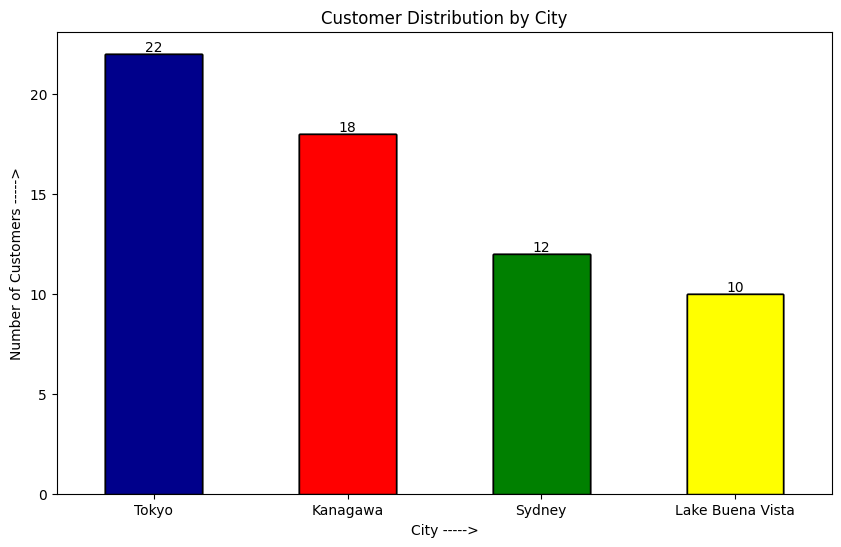

In [543]:
#Plotting the Data Visualisation of Customer Disribution by City

#Assigning different colours to different cities
colour=['darkblue','red','green','yellow']

# Annotate each bar with its value
for i, v in enumerate(city_distribution):
    city_distribution.plot(kind='bar', figsize=(10, 6), color=colour,edgecolor='black').text(i, v + 0.1, str(v), color='black', ha='center')

#Assigning the title,xlabel and ylabel to the plot
plt.title('Customer Distribution by City')
plt.xlabel('City ----->')
plt.ylabel('Number of Customers ----->')

# Rotate x-axis labels horizontally
plt.xticks(rotation=0)

#Showing the plot
plt.show()

<h3>City Distribution:</h3>

1. The bar chart shows the distribution of customers across different cities.
1. Each bar represents a city, and the height of the bar indicates the number of customers in that city.
<br><h3>Insights:</h3>

1. The number of customers varies across different cities.
1. You can easily identify which cities have a higher concentration of customers and which ones have fewer.
<br><h3>Color Coding:</h3>

1. You've used different colors (darkblue, red, green, yellow) to make the plot visually appealing.
1. Color coding can help in distinguishing bars quickly.
<br><br><h3>Annotations:</h3>

1. The numbers on top of each bar represent the exact count of customers in that city.
1. Annotations provide precise information about the customer count for each city.
<br><h3>Title and Labels:</h3>

1. The title, x-axis label, and y-axis label provide context and make the plot more understandable.
<br><h3>Visualization Quality:</h3>

1. The use of a bar chart is appropriate for displaying the distribution of customers across cities.

In [579]:
# Merge the dataframes to create a comprehensive view of the order history
merged_df = pd.merge(ord_df, cust_df, on='customer_id')
merged_df = pd.merge(merged_df, prod_df, on='product_id')

# Group by customer_id and count the number of orders
customer_order_counts = merged_df['name'].value_counts()

# Get the top N most frequent customers (adjust N as needed)
top_customers = customer_order_counts.head(10)

# Display the result
print("Most frequent customers based on order history:")
print(top_customers)

Most frequent customers based on order history:
name
Mia          5
Oliver       5
Ava          5
Ethan        4
Emma         4
Sophia       4
Evelyn       3
Henry        3
Alexander    3
William      3
Name: count, dtype: int64


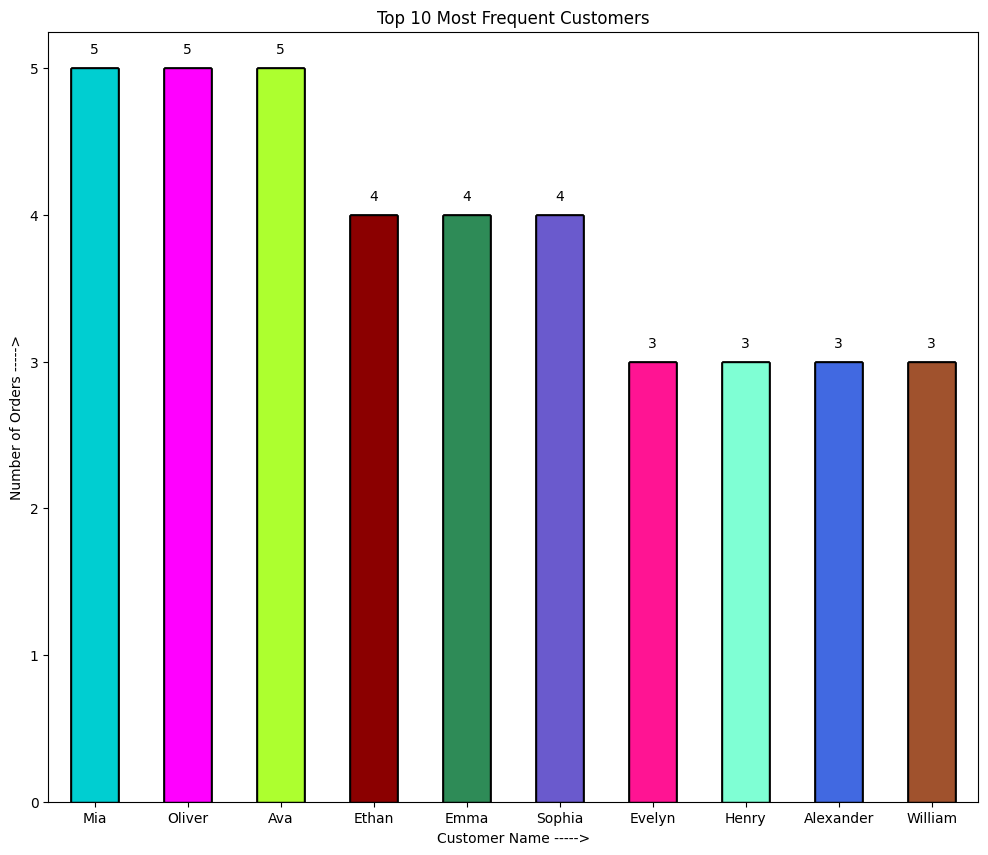

In [581]:
# Plot the results
plt.figure(figsize=(10, 6))
colour=['darkturquoise','fuchsia','greenyellow','darkred','seagreen','slateblue','deeppink','aquamarine','royalblue','sienna']

# Annotate each bar with its value
for i, v in enumerate(top_customers):
    top_customers.plot(kind='bar', figsize=(12, 10), color=colour,edgecolor='black').text(i, v + 0.1, str(v), color='black', ha='center')
    
plt.title('Top {} Most Frequent Customers'.format(10))
plt.xlabel('Customer Name ----->')
plt.ylabel('Number of Orders ----->')

# Rotate x-axis labels horizontally
plt.xticks(rotation=0)

plt.show()

<h3>Top Customers:</h3>

The bar chart displays the top 10 most frequent customers based on the number of orders they have placed.
<h3>Customer ID and Order Count:</h3>

Each bar represents a customer, and the height of the bar indicates the number of orders made by that customer.
<h3>Color Coding:</h3>

Different colors are used for each bar, enhancing the visual appeal and making it easier to distinguish between customers.
<h3>Annotations:</h3>

Numbers on top of each bar provide the exact count of orders for each customer, offering precise information.
<h3>Customer Engagement:</h3>

This plot can be useful for identifying and acknowledging customers who contribute significantly to the order history. Businesses may want to focus on retaining and engaging with these top customers.
<h3>Adjustable N:</h3>

The code allows for flexibility by adjusting the variable N to display a different number of top customers based on the order history.

In [511]:
category_counts = prod_df['category'].value_counts()
print(category_counts)

category
electronics    32
appliance      20
furniture       9
Name: count, dtype: int64


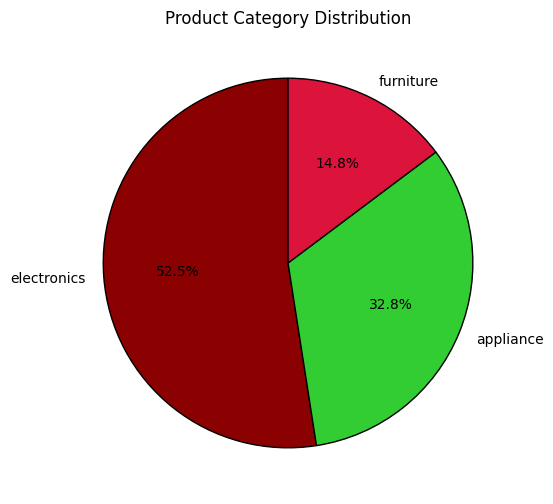

In [573]:
colours=['darkred','limegreen','crimson','lightsteelblue']
edgecolor='black'
category_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(6, 6),colors=colours,wedgeprops=dict(edgecolor=edgecolor))
plt.title('Product Category Distribution')
plt.ylabel('')
plt.show()

<h3>Category Distribution:</h3>

The pie chart represents the distribution of product categories in the dataset<br><h3>.
Color Codi</h3>ng<br>:

Different colors (darkred, limegreen, crimson, lightsteelblue) are used to distinguish between different categories, making the chart visually appeal<h3>ing.
Proportion of Categ</h3>ories:

Each sector of the pie chart represents a product category, and the size of each sector is proportional to the number of products in that category.
Percentage Labels:

The autopct='%1.1f%%' parameter displays the percentage distribution of each category next to its corresponding sector.
Start Angle:

The pie chart starts at a 90-degree angle, providing a clear view of the distribution.
Title and Label:

The title 'Product Category Distribution' provides context, and the plt.ylabel('') removes the default y-axis label for a cleaner presentation.
Category Information:

Businesses can quickly identify which product categories dominate the dataset and which ones are less represented.
Visualization Type:

A pie chart is suitable for illustrating the relative proportions of different categories in a dataset.

In [412]:
# Merging dataframes
merged_df = pd.merge(ord_df, prod_df, on='product_id', how='inner')

# Counting the number of products in each subcategory
subcategory_distribution = merged_df['sub_category'].value_counts()

# Displaying the result
print(subcategory_distribution)

sub_category
Electronics      27
Computers         9
Wearables         5
Chairs            4
Audio             3
Entertainment     3
Tablets           3
Cameras           2
Lamps             2
chairs            2
Sofas             2
Tables            2
TVs               2
Desks             2
computer          2
Accessories       2
Printers          1
Consoles          1
Furniture         1
Photography       1
Name: count, dtype: int64


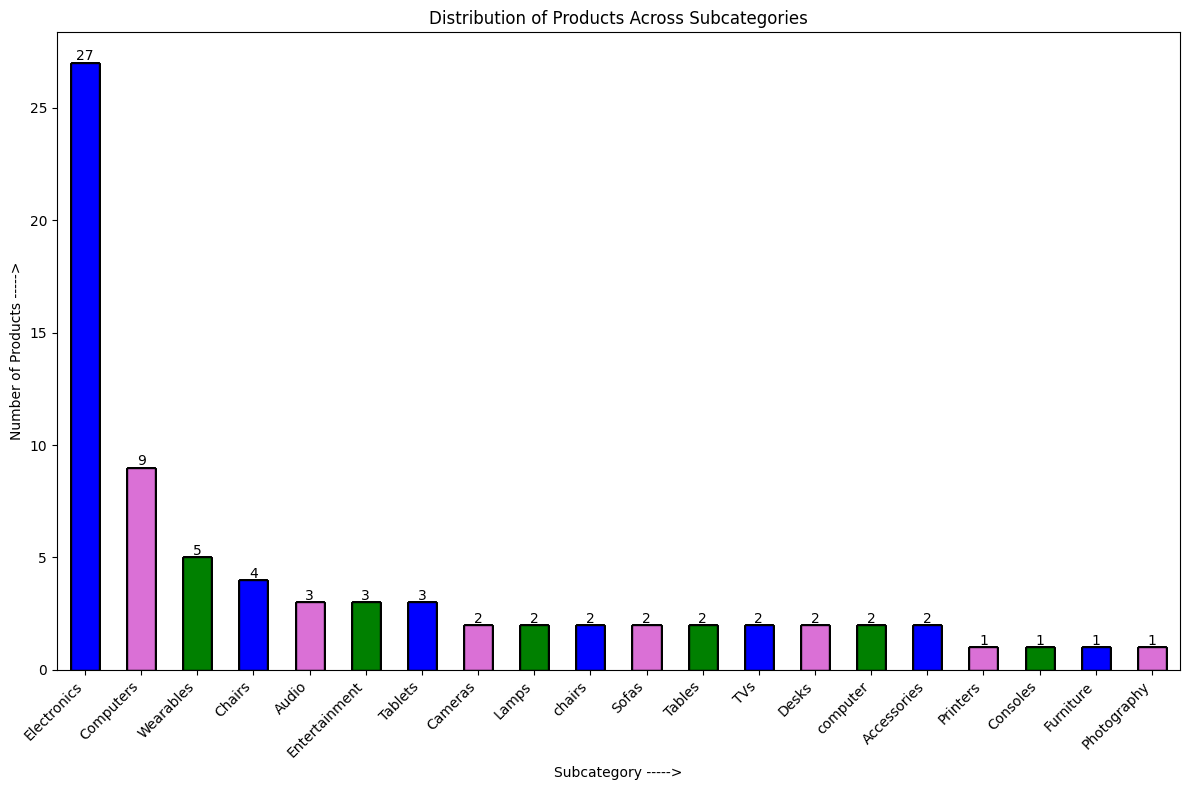

In [417]:
# Plotting the distribution using a bar plot
plt.figure(figsize=(10, 6))

# Annotate each bar with its value
for i, v in enumerate(subcategory_distribution):
    subcategory_distribution.plot(kind='bar', figsize=(12, 8), color=colour,edgecolor='black').text(i, v + 0.1, str(v), color='black', ha='center')
    
plt.title('Distribution of Products Across Subcategories')
plt.xlabel('Subcategory ----->')
plt.ylabel('Number of Products ----->')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<h3>Subcategory Distribution:</h3>

The bar chart displays the distribution of products across different subcategories.
<h3>Color Coding:</h3>

Different colors (darkblue, red, green, yellow) are used for each bar, making it visually distinct and easier to interpret.
<h3>Bar Heights:</h3>

Each bar represents a subcategory, and the height of the bar indicates the number of products in that subcategory.
<h3>Annotations:</h3>

The numbers on top of each bar provide the exact count of products in each subcategory.
<h3>X-axis Labels:</h3>

The x-axis labels represent different subcategories, allowing for easy identification.
<h3>Rotation of Labels:</h3>

X-axis labels are rotated by 45 degrees and aligned to the right for better visibility, especially when dealing with long category names.
<h3>Title and Labels:</h3>

The title 'Distribution of Products Across Subcategories' provides context, and labels on both axes add clarity to the plot.
<h3>Visualization Quality:</h3>

A bar plot is suitable for showing the distribution of products in different subcategories, providing a clear and intuitive representation.

In [421]:
# Merge dataframes to get relevant information
merged_df = pd.merge(ord_df, prod_df, on='product_id', how='inner')

# Group by product_id and sum the quantities to get total stock sold
stock_sold = merged_df.groupby('product_id')['quantity'].sum().reset_index()

# Merge with prod_df to get the remaining stock
stock_df = pd.merge(prod_df, stock_sold, on='product_id', how='left')

# Fill NaN values with 0 for products that haven't been sold
stock_df['quantity'].fillna(0, inplace=True)  # Corrected column name to 'quantity'

# Calculate remaining stock
stock_df['remaining_stock'] = stock_df['stock'] - stock_df['quantity']

# Define a threshold for low stock
low_stock_threshold = 10

# Filter products with low stock
low_stock_products = stock_df[stock_df['remaining_stock'] < low_stock_threshold]

# Print the products with low stock
print("Products with Low Stock:")
print(low_stock_products[['product_id', 'product_name', 'remaining_stock']])

Products with Low Stock:
   product_id  product_name  remaining_stock
53       P114  Refrigerator              9.0
55       P102         Chair              7.0
56       P148        Tablet              9.0
57       P141       Printer              8.0
58       P112         chair              8.0
59       P105       Blender              8.0
60       P132      Sofa Set              8.0


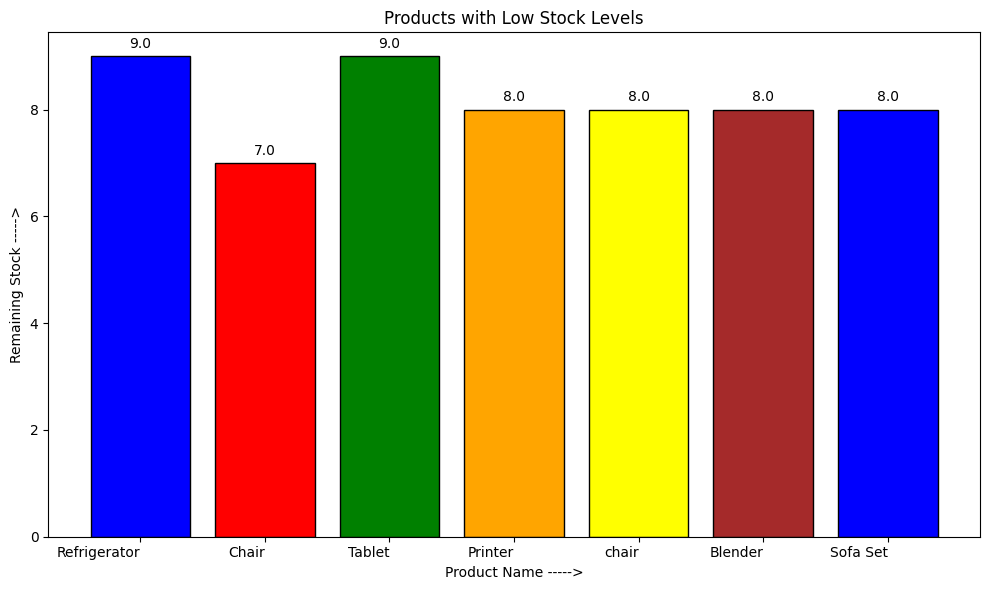

In [420]:
# Data visualization
plt.figure(figsize=(10, 6))
colour_1=['blue','red','green','orange','yellow','brown']
# Annotate points on the bar chart
for i, value in enumerate(low_stock_products['remaining_stock']):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')
    
plt.bar(low_stock_products['product_name'], low_stock_products['remaining_stock'],color=colour_1,edgecolor='black')

plt.title('Products with Low Stock Levels')
plt.xlabel('Product Name ----->')
plt.ylabel('Remaining Stock ----->')
plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.show()

<h3>Low Stock Products:</h3>

The bar chart highlights products with low stock levels based on the defined threshold<h3>.
Color Codi</h3>ng:

Different colors (blue, red, green, orange, yellow, brown) are used for each bar, making it visually appeal<h3>ing.
Bar He</h3>ights:

Each bar represents a product with the height indicating its remaining stock level.
Annotations:

Numbers on top of each bar provide the exact count of remaining stock for each product.
Threshold:

The threshold for low stock is set at 10 units, and products falling below this threshold are considered low in stock.
X-axis Labels:

X-axis labels represent the names of products, allowing for easy identification.
Title and Labels:

The title 'Products with Low Stock Levels' provides context, and labels on both axes add clarity to the plot.
Visualization Quality:

A bar chart effectively communicates the low stock levels for various products, helping businesses identify items that may require restocking or special attention.

In [296]:
# Calculate average, maximum, and minimum selling prices for products
average_selling_price = prod_df['selling_price'].mean()
max_selling_price = prod_df['selling_price'].max()
min_selling_price = prod_df['selling_price'].min()

# Print the results
print(f"Average Selling Price: {average_selling_price}")
print(f"Maximum Selling Price: {max_selling_price}")
print(f"Minimum Selling Price: {min_selling_price}")

Average Selling Price: 17774.62262295082
Maximum Selling Price: 70000.0
Minimum Selling Price: 450.0


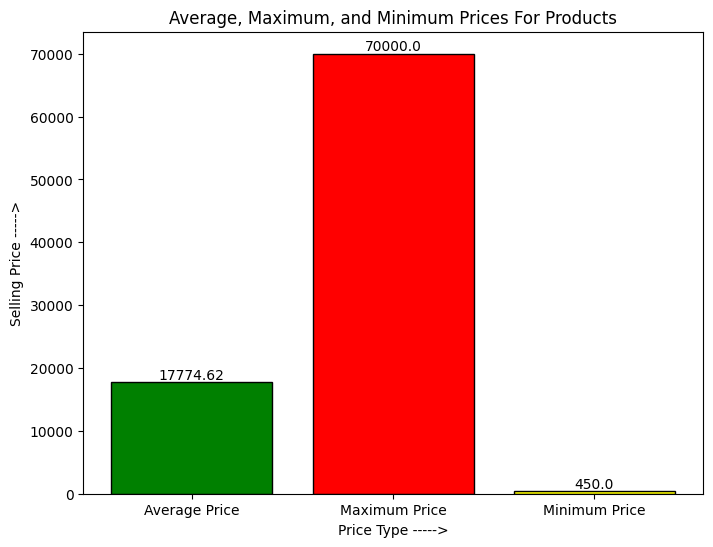

In [304]:
# Data visualization
plt.figure(figsize=(8, 6))
colour_2=['green', 'red', 'yellow']

# Plotting average, maximum, and minimum selling prices
bars=plt.bar(['Average Price', 'Maximum Price', 'Minimum Price'], [average_selling_price, max_selling_price, min_selling_price], color=colour_2,edgecolor='black')

# Annotate each bar with its value
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.1, round(yval, 2), ha='center', va='bottom')

plt.title('Average, Maximum, and Minimum Prices For Products')
plt.xlabel('Price Type ----->')
plt.ylabel('Selling Price ----->')
plt.show()

<h3>Price Statistics:</h3>

The bar chart represents the average, maximum, and minimum selling prices for products<h3>.
Color Codi</h3>ng:

Different colors (green, red, yellow) are used for each bar, enhancing visual distinct<h3>ion.
Bar He</h3>ights:

Each bar corresponds to a specific price type (average, maximum, minimum), and the height represents the corresponding price value.
Annotations:

Numbers on top of each bar provide the exact values for the average, maximum, and minimum selling prices.
Comparison:

The visual representation makes it easy to compare the different price metrics, providing a quick overview of the price distribution.
Title and Labels:

The title 'Average, Maximum, and Minimum Prices For Products' adds context, and labels on both axes provide clarity.
Visualization Quality:

A bar chart is suitable for comparing numerical values, making it effective for showcasing different price statistics.

In [388]:
# Merge dataframes to get relevant information
merged_df = pd.merge(ord_df, prod_df, on='product_id')

# Group by product_name and calculate the number of orders
product_orders = merged_df['product_name'].value_counts().nlargest(10)
print(product_orders)

product_name
Tablet            5
Vacuum Cleaner    4
Television        3
Air Purifier      3
Coffee Maker      3
Chair             3
Smartwatch        3
Digital Camera    3
chair             2
Microwave Oven    2
Name: count, dtype: int64


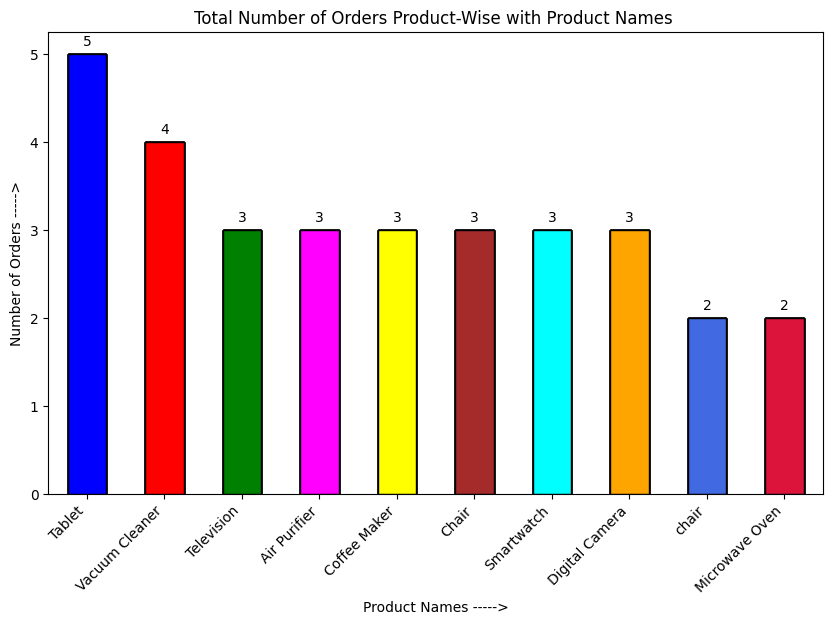

In [423]:
# Plotting the results
plt.figure(figsize=(10, 6))
colour_3=['blue','red','green','magenta','yellow','brown','cyan','orange','royalblue','crimson']

# Annotate each bar with its value
for i, v in enumerate(product_orders):
    product_orders.plot(kind='bar', figsize=(10, 6), color=colour_3,edgecolor='black').text(i, v + 0.1, str(v), color='black', ha='center')
    
plt.title('Total Number of Orders Product-Wise with Product Names ')
plt.xlabel('Product Names ----->')
plt.ylabel('Number of Orders ----->')
plt.xticks(rotation=45, ha='right')
plt.show()

<h3>Top Products by Order Count:</h3>

The bar chart highlights the top 10 products with the highest number of orders<h3>.
Color Codi</h3>ng:

Different colors (blue, red, green, magenta, yellow, brown, cyan, orange, royalblue, crimson) are used for each bar, enhancing visual distinc<br>t<h3>ion.
Bar He</h3>ights:

Each bar represents a product, and the height corresponds to the total number of orders for that product.
Annotations:

Numbers on top of each bar provide the exact count of orders for each product.
X-axis Labels:

X-axis labels represent the names of the top products, allowing for easy identification.
Rotation of Labels:

X-axis labels are rotated by 45 degrees and aligned to the right for better visibility, especially when dealing with long product names.
Title and Labels:

The title 'Total Number of Orders Product-Wise with Product Names' provides context, and labels on both axes add clarity to the plot.
Visualization Quality:

A bar chart effectively communicates the order distribution among different products, helping businesses identify popular products and trends in customer preferences.

In [544]:
#Storing the counts of order_status in ord_df
order_status_counts = ord_df['order_status'].value_counts()

#Printing the counts
print(order_status_counts)

order_status
Delivered    27
Pending      25
Shipped      16
Cancelled     6
delivered     1
Returned      1
Name: count, dtype: int64


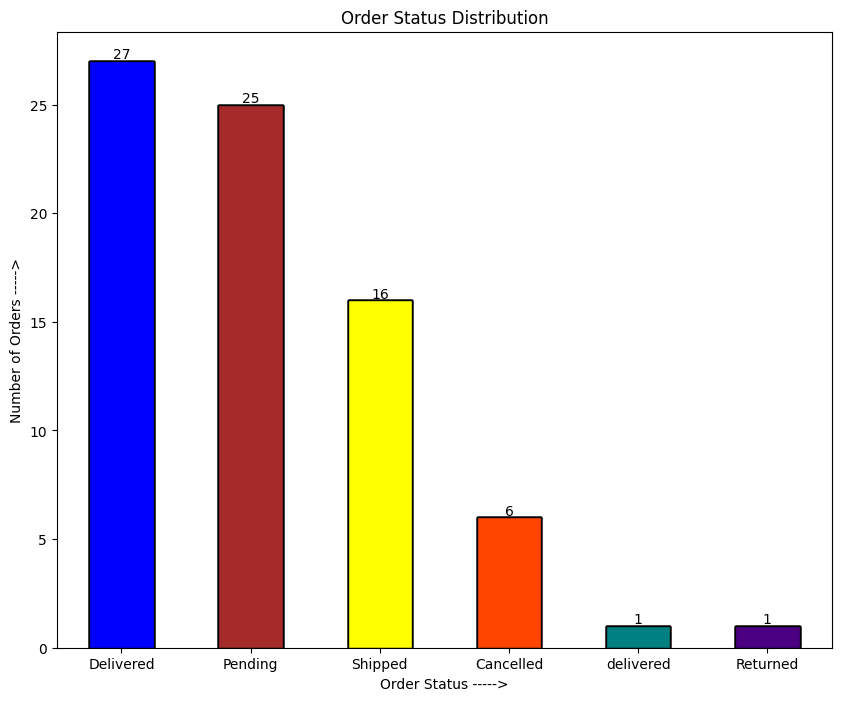

In [425]:
color_1=['blue','brown','yellow','orangered','teal','indigo']

# Annotate each bar with its value
for i, v in enumerate(order_status_counts):
    order_status_counts.plot(kind='bar', figsize=(10, 8), color=color_1,edgecolor='black').text(i, v + 0.1, str(v), color='black', ha='center')

plt.title('Order Status Distribution')
plt.xlabel('Order Status ----->')
plt.ylabel('Number of Orders ----->')

# Rotate x-axis labels horizontally
plt.xticks(rotation=0)

plt.show()

Order Status Distribution:

The bar chart illustrates the distribution of order statuses, indicating how many orders fall into each status category.
Color Coding:

Different colors (blue, brown, yellow, orangered, teal, indigo) are used for each order status, enhancing visual distinction.
Bar Heights:

Each bar represents an order status, and the height corresponds to the number of orders with that status.
Annotations:

Numbers on top of each bar provide the exact count of orders for each status.
X-axis Labels:

X-axis labels represent the different order statuses, allowing for easy identification.
Rotation of Labels:

X-axis labels are not rotated in this case as order statuses are typically short and can be displayed horizontally.
Title and Labels:

The title 'Order Status Distribution' provides context, and labels on both axes add clarity to the plot.
Visualization Quality:

A bar chart is an effective choice for visualizing categorical data like order statuses. It allows for a quick assessment of the distribution and relative frequencies of each category.

In [453]:
# Merge the dataframes to get a consolidated view
merged_df = pd.merge(ord_df, prod_df, on='product_id')
merged_df = pd.merge(merged_df, cust_df, on='customer_id')

# Calculate the total quantity for each product
product_quantity = merged_df.groupby('product_name')['quantity'].sum().reset_index()

# Sort the products based on quantity in descending order
sorted_products = product_quantity.sort_values(by='quantity', ascending=False)

# Display the top N most popular products
top_n = 10  # Change N to the desired number of top products
top_products = sorted_products.head(top_n)

# Print the top products
print("Top {} Most Popular Products:".format(top_n))
print(top_products)

Top 10 Most Popular Products:
       product_name  quantity
35   Vacuum Cleaner       7.0
33           Tablet       7.0
29       Smartwatch       5.0
7         Desk Lamp       4.0
18        Microwave       4.0
13  Fitness Tracker       4.0
34       Television       4.0
0      Air Purifier       4.0
6              Desk       4.0
5      Coffee Maker       4.0


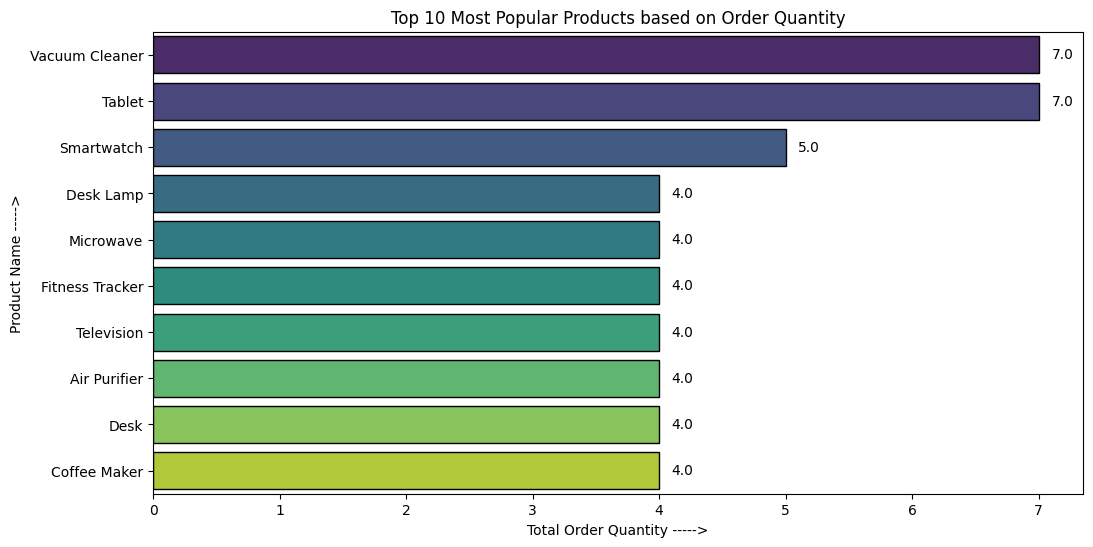

In [496]:
# Data visualization using seaborn
plt.figure(figsize=(12, 6))
ax_1=sns.barplot(x='quantity', y='product_name', data=top_products, hue='product_name', palette='viridis', edgecolor='black', legend=False)

# Annotate each bar with its respective quantity
for index, value in enumerate(top_products['quantity']):
    ax_1.text(value + 0.1, index, str(value), ha='left', va='center', color='black')
    
plt.title('Top {} Most Popular Products based on Order Quantity'.format(top_n))
plt.xlabel('Total Order Quantity ----->')
plt.ylabel('Product Name ----->')
plt.show()

Top Products by Order Quantity:

The horizontal bar plot displays the top N most popular products based on the total order quantity.
Color Coding:

A viridis color palette is used for each bar, enhancing visual appeal.
Bar Lengths:

Each bar represents a product, and the length corresponds to the total order quantity for that product.
Annotations:

Numbers to the right of each bar provide the exact total order quantity for each product.
X-axis and Y-axis Labels:

The x-axis represents the total order quantity, and the y-axis represents the product names. This orientation is particularly useful for identifying the most popular products at a glance.
Title:

The title 'Top N Most Popular Products based on Order Quantity' provides context and clarifies the purpose of the plot.
Visualization Quality:

The horizontal bar plot effectively communicates the relative popularity of products, making it easy to identify the top-performing items in terms of order quantity.

In [391]:
# Merge dataframes
merged_df = pd.merge(ord_df, prod_df, on='product_id')
merged_df['Total_Revenue']=merged_df['quantity']*merged_df['total_price']

# Group by product and sum total prices
revenue_by_product = merged_df.groupby('product_name')['Total_Revenue'].sum().sort_values(ascending=False)

# Select top 10 products
top_10_products = revenue_by_product.head(10)

# Display the top 10 products by total revenue
print(top_10_products)

product_name
Tablet             297000.0
Television         208000.0
Sofa Set           180000.0
Desk               148000.0
Smartwatch         140000.0
Vacuum Cleaner     139000.0
Laptop             110000.0
Air Purifier       100000.0
Microwave           78000.0
Fitness Tracker     74000.0
Name: Total_Revenue, dtype: float64


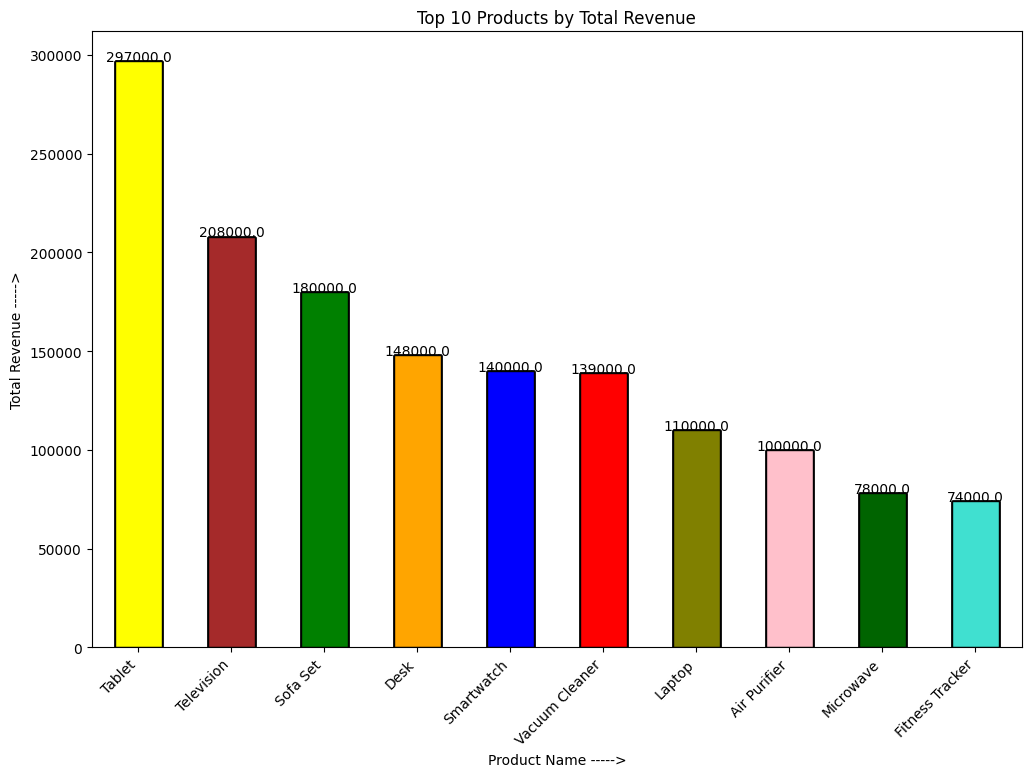

In [458]:
# Data visualization (example using matplotlib)
plt.figure(figsize=(10, 6))
color_1a=['yellow','brown','green','orange','blue','red','olive','pink','darkgreen','turquoise']

# Annotate each bar with its value
for i, v in enumerate(top_10_products):
    top_10_products.plot(kind='bar', figsize=(12, 8), color=color_1a,edgecolor='black').text(i, v + 0.1, str(v), color='black', ha='center')
    
plt.xlabel('Product Name ----->')
plt.ylabel('Total Revenue ----->')
plt.title('Top 10 Products by Total Revenue')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

Top Products by Total Revenue:

The bar chart visually represents the top 10 products with the highest total revenue.
Color Coding:

Different colors (yellow, brown, green, orange, blue, red, olive, pink, darkgreen, turquoise) are used for each bar, enhancing visual distinction.
Bar Heights:

Each bar represents a product, and the height corresponds to the total revenue generated by that product.
Annotations:

Numbers on top of each bar provide the exact total revenue for each product.
X-axis Labels:

X-axis labels represent the names of the top products, allowing for easy identification.
Rotation of Labels:

X-axis labels are rotated by 45 degrees and aligned to the right for better visibility, especially when dealing with long product names.
Title and Labels:

The title 'Top 10 Products by Total Revenue' provides context, and labels on both axes add clarity to the plot.
Visualization Quality:

A bar chart effectively communicates the relative total revenue generated by different products, making it easy to identify the top-performing items.

In [428]:
# Merge dataframes to get necessary information
merged_df = pd.merge(ord_df, prod_df, on='product_id')
merged_df = pd.merge(merged_df, cust_df, on='customer_id')

# Calculate total revenue product category-wise
category_revenue = merged_df.groupby('category')['total_price'].sum()

# Calculate total revenue
total_revenue = merged_df['total_price'].sum()

# Calculate percentage
category_percentage = (category_revenue / total_revenue) * 100

# Print the results
print("Total Revenue: $", total_revenue)
print("\nCategory-wise Revenue:")
print(category_revenue)
print("\nCategory-wise Percentage:")
print(category_percentage)

Total Revenue: $ 1586400.0

Category-wise Revenue:
category
appliance      327900.0
electronics    829000.0
furniture      429500.0
Name: total_price, dtype: float64

Category-wise Percentage:
category
appliance      20.669440
electronics    52.256682
furniture      27.073878
Name: total_price, dtype: float64


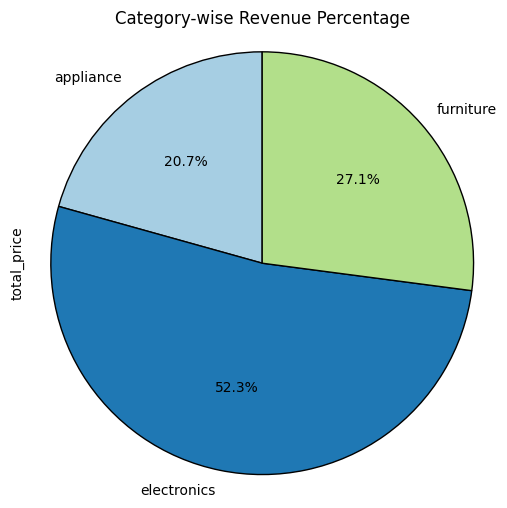

In [545]:
# Data Visualization (using pie chart)
plt.figure(figsize=(6,6))
edgecolor='black'
category_percentage.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors,wedgeprops=dict(edgecolor=edgecolor))
plt.title('Category-wise Revenue Percentage')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

<h3>Total Revenue:</h3>

The code calculates and prints the total revenue across all categories<h3>.
Category-wise Reven</h3>ue:

The code calculates and prints the total revenue for each product categ<h3>ory.
Category-wise Perce</h3>ntage:

The code calculates and prints the percentage of total revenue contributed by each product category.
Pie Chart:

The pie chart visually represents the distribution of revenue across different product categories.
Color Coding:

Different colors are used for each category slice in the pie chart.
Percentage Labels:

Each category slice is labeled with the percentage of total revenue it represents.
Title:

The title 'Category-wise Revenue Percentage' provides context to the pie chart.
Equal Aspect Ratio:

The plt.axis('equal') ensures that the pie chart is drawn as a circle.

In [323]:
# Merge dataframes to get relevant information
merged_df = pd.merge(ord_df, prod_df, on='product_id')
merged_df = pd.merge(merged_df, cust_df, on='customer_id')

# Calculate the profit for each product
merged_df['profit'] = merged_df['selling_price'] - merged_df['original_price']

# Group by product_id and sum the profits
profit_by_product = merged_df.groupby('product_id')['profit'].sum().reset_index()

# Sort the dataframe based on total profit in descending order
profit_by_product = profit_by_product.sort_values(by='profit', ascending=False)

# Identify the most profitable products
most_profitable_products = profit_by_product.head(10)  # You can adjust the number based on your preference

# Display the most profitable products
print("Top 10 Most Profitable Products:")
print(most_profitable_products)

Top 10 Most Profitable Products:
   product_id  profit
2        P105  -100.0
7        P112  -400.0
14       P119  -500.0
56       P161  -500.0
55       P160  -500.0
46       P151  -500.0
57       P162 -1000.0
41       P146 -1000.0
42       P147 -1000.0
44       P149 -1000.0


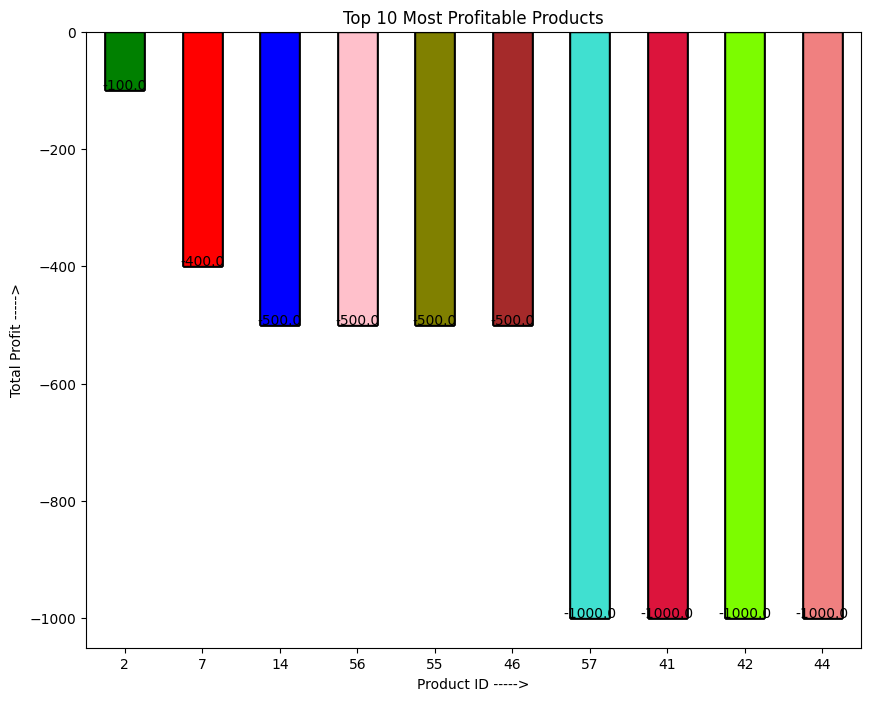

In [503]:
# Data visualization using bar plot
plt.figure(figsize=(10, 6))
color_1d=['green','red','blue','pink','olive','brown','turquoise','crimson','lawngreen','lightcoral']

# Annotate each bar with its value
for i, v in enumerate(most_profitable_products['profit']):
    most_profitable_products['profit'].plot(kind='bar', figsize=(10, 8), color=color_1d,edgecolor='black').text(i, v + 1, str(v), color='black', ha='center')
    
plt.xlabel('Product ID ----->')
plt.ylabel('Total Profit ----->')
plt.title('Top 10 Most Profitable Products')
plt.xticks(rotation=0)
plt.show()

Top Most Profitable Products:

The bar chart visually represents the top 10 most profitable products based on the total profit.
Color Coding:

Different colors (green, red, blue, pink, olive, brown, turquoise, crimson, lawngreen, lightcoral) are used for each bar, enhancing visual distinction.
Bar Heights:

Each bar represents a product, and the height corresponds to the total profit generated by that product.
Annotations:

Numbers on top of each bar provide the exact total profit for each product.
X-axis Labels:

X-axis labels represent the product IDs of the most profitable products, allowing for easy identification.
Rotation of Labels:

X-axis labels are not rotated in this case, as product IDs are typically short and can be displayed horizontally.
Title and Labels:

The title 'Top 10 Most Profitable Products' provides context, and labels on both axes add clarity to the plot.
Visualization Quality:

A bar chart is effective for visually comparing the total profit generated by different products. It helps businesses identify the products contributing the most to overall profitability.

In [329]:
# Merge dataframes to create a consolidated dataframe
merged_df = pd.merge(ord_df, prod_df, on='product_id')

# Group by product name and calculate total order quantities
total_quantities = merged_df.groupby('product_name')['quantity'].sum().reset_index()

# Identify product names with the highest and lowest order quantities
highest_quantity_product = total_quantities.loc[total_quantities['quantity'].idxmax()]
lowest_quantity_product = total_quantities.loc[total_quantities['quantity'].idxmin()]

print("Product with the highest order quantity:", highest_quantity_product['product_name'])
print("Product with the lowest order quantity:", lowest_quantity_product['product_name'])

Product with the highest order quantity: Tablet
Product with the lowest order quantity: Dishwasher


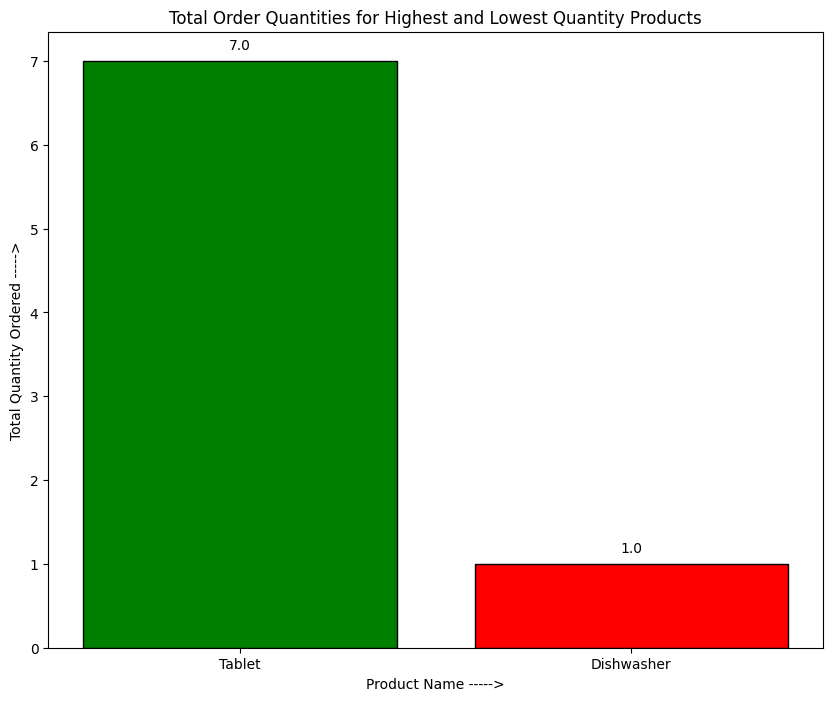

In [481]:
# Data Visualization
plt.figure(figsize=(10, 8))

# Plot bar chart for total order quantities
plt.bar([highest_quantity_product['product_name'], lowest_quantity_product['product_name']],
        [highest_quantity_product['quantity'], lowest_quantity_product['quantity']], color=['green', 'red'],edgecolor='black')
plt.title('Total Order Quantities for Highest and Lowest Quantity Products')

# Annotate each bar with its respective quantity
for index, value in enumerate([highest_quantity_product['quantity'], lowest_quantity_product['quantity']]):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom', color='black')
    
plt.xlabel('Product Name ----->')
plt.ylabel('Total Quantity Ordered ----->')

# Display the plot
plt.show()

Highest Order Quantity:

The green bar represents the product with the highest total order quantity.
Businesses can analyze and leverage the popularity of this product for marketing strategies or inventory management.
Lowest Order Quantity:

The red bar represents the product with the lowest total order quantity.
Further investigation into the reasons for low demand can inform decisions about product promotion or potential discontinuation.
Comparative Analysis:

The side-by-side comparison of highest and lowest order quantities provides a quick visual understanding of the product distribution.
Decision Support:

This visualization aids in making informed decisions related to inventory management, marketing, and produer demand.







In [431]:
# Merge dataframes to get the relevant information
merged_df = pd.merge(ord_df, cust_df, on='customer_id')

# Group by customer name and calculate total order quantity
customer_order_quantities = merged_df.groupby('name')['quantity'].sum().reset_index()

# Identify customers with the highest and lowest order quantities
highest_quantity_customer = customer_order_quantities.loc[customer_order_quantities['quantity'].idxmax()]
lowest_quantity_customer = customer_order_quantities.loc[customer_order_quantities['quantity'].idxmin()]

# Print the results
print("Customer with the highest order quantity:")
print(highest_quantity_customer['name'])

print("\nCustomer with the lowest order quantity:")
print(lowest_quantity_customer['name'])

Customer with the highest order quantity:
Oliver

Customer with the lowest order quantity:
Aiden


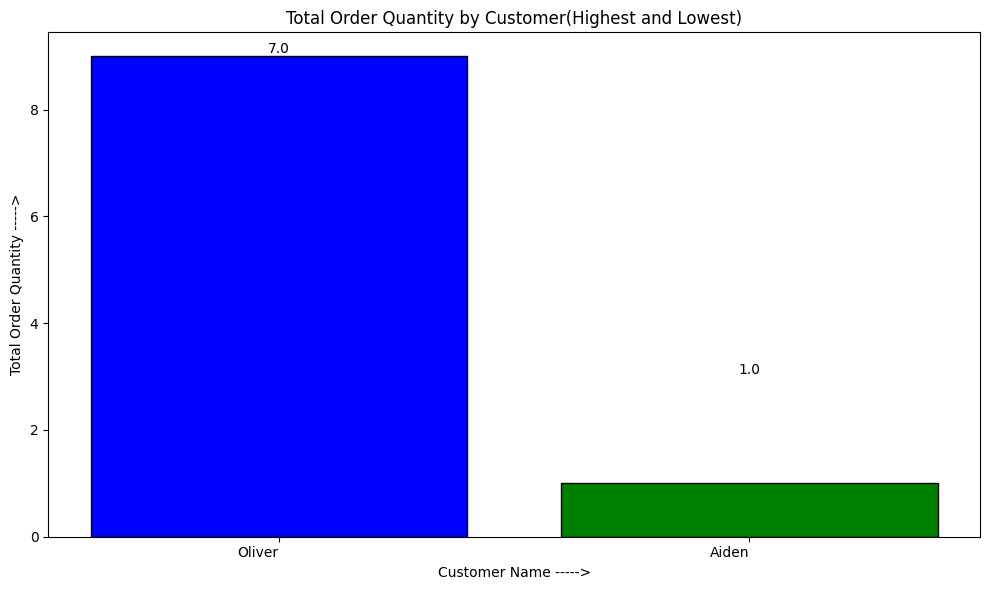

In [484]:
# Data visualization
plt.figure(figsize=(10, 6))
plt.bar([highest_quantity_customer['name'], lowest_quantity_customer['name']], 
        [highest_quantity_customer['quantity'], lowest_quantity_customer['quantity']],color=['blue','green'],edgecolor='black')
plt.title('Total Order Quantity by Customer(Highest and Lowest)')

# Annotate each bar with its respective quantity
for index, value in enumerate([highest_quantity_product['quantity'], lowest_quantity_product['quantity']]):
    plt.text(index, value + 2, str(value), ha='center', va='bottom', color='black')
    
plt.xlabel('Customer Name ----->')
plt.ylabel('Total Order Quantity ----->')
plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.show()

Highest and Lowest Quantity Products:

The bar chart visually represents the total order quantities for the product with the highest order quantity (in green) and the product with the lowest order quantity (in red).
Bar Heights:

The height of each bar corresponds to the total order quantity for the respective product.
Annotations:

Numbers on top of each bar provide the exact total order quantity for each product.
Product Names:

X-axis labels represent the names of the highest and lowest quantity products.
Color Coding:

Different colors (green and red) are used for the bars, enhancing visual distinction.
Title and Labels:

The title 'Total Order Quantities for Highest and Lowest Quantity Products' provides context, and labels on both axes add clarity to the plot.
Visualization Quality:

A bar chart effectively communicates the total order quantities for specific products, making it easy to identify the products with the highest and lowest demand.

In [546]:
#Storing the counts of payment_mode in ord_df
payment_mode_counts = ord_df['payment_mode'].value_counts()

#Printing the counts
print(payment_mode_counts)

payment_mode
Online    43
COD       33
Name: count, dtype: int64


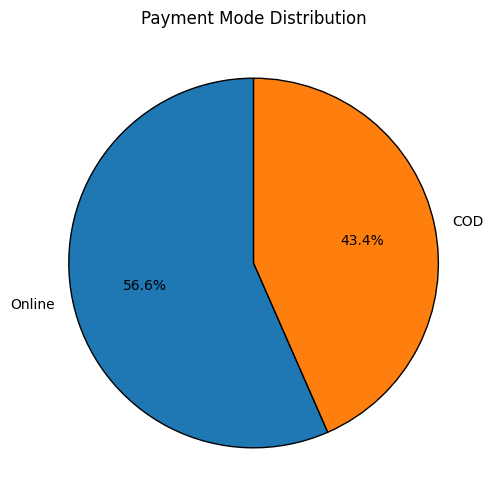

In [547]:
#Plotting the pie chart of Payment Mode Distribution
edgecolor='black'
payment_mode_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(6, 6),wedgeprops=dict(edgecolor=edgecolor))
plt.title('Payment Mode Distribution')
plt.ylabel('')
plt.show()

Payment Mode Distribution:

The pie chart visually represents the distribution of payment modes used in the orders.
Slice Percentages:

Each slice of the pie chart represents a payment mode, and the percentage label on each slice indicates its proportion relative to the total.
Start Angle:

The start angle of 90 degrees positions the first slice vertically, providing a clear view of the distribution.
Color Coding:

The default color scheme is used for different payment modes.
Title:

The title 'Payment Mode Distribution' provides context to the pie chart.
Equal Aspect Ratio:

The plt.axis('equal') ensures that the pie chart is drawn as a circle.


In [398]:
# Merge dataframes to get necessary information
merged_df = pd.merge(ord_df, cust_df, on='customer_id')
merged_df = pd.merge(merged_df, prod_df, on='product_id')

# Convert 'order_date' column to datetime type
merged_df['order_date'] = pd.to_datetime(merged_df['order_date'])

# Extract month and year from the 'order_date' column
merged_df['month_name'] = merged_df['order_date'].dt.strftime('%B')

# Group by month and year, and calculate total sales
monthly_sales = merged_df.groupby('month_name')['total_price'].sum().reset_index()
print(monthly_sales)

  month_name  total_price
0   December     429450.0
1   February     446000.0
2    January     503000.0
3      March     186500.0
4   November      21450.0


C:\Users\Bandana\AppData\Local\Temp\ipykernel_19088\1430228031.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax_2=sns.barplot(x='month_name',y='total_price',data=monthly_sales,palette=custom_color,edgecolor='black')


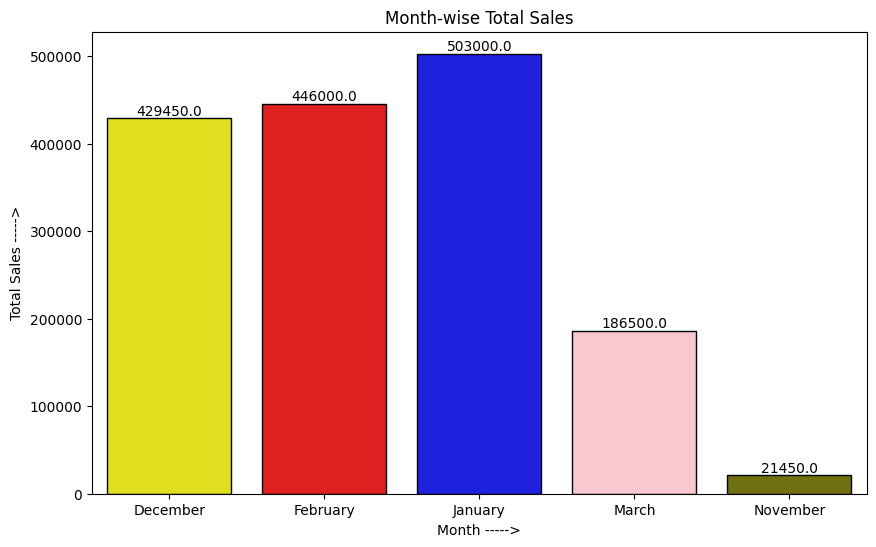

In [506]:
# Data Visualization
plt.figure(figsize=(10, 6))
custom_color=['yellow','red','blue','pink','olive']
ax_2=sns.barplot(x='month_name',y='total_price',data=monthly_sales,palette=custom_color,edgecolor='black')

# Annotate each bar with its respective quantity
for index, value in enumerate(monthly_sales['total_price']):
    ax_2.text(index, value + 1, str(value), ha='center', va='bottom', color='black')

plt.title('Month-wise Total Sales')
plt.xlabel('Month ----->')
plt.ylabel('Total Sales ----->')
plt.show()

Month-wise Total Sales:

The bar chart visually represents the total sales for each month.
Bar Heights:

The height of each bar corresponds to the total sales for the respective month.
Annotations:

Numbers on top of each bar provide the exact total sales for each month.
Color Coding:

Different colors (yellow, red, blue, pink, olive) are used for each month, enhancing visual distinction.
X-axis Labels:

X-axis labels represent the names of the months.
Title and Labels:

The title 'Month-wise Total Sales' provides context, and labels on both axes add clarity to the plot.
Visualization Quality:

A bar chart is effective for visually comparing total sales across different months, making it easy to identify trends or seasonality in sales.

In [373]:
# Grouping by order_date and summing up the quantities
order_date_grouped = ord_df.groupby('order_date')['quantity'].sum()

# Finding the peak order date
peak_order_date = order_date_grouped.idxmax()
print(peak_order_date)

2024-01-02 00:00:00


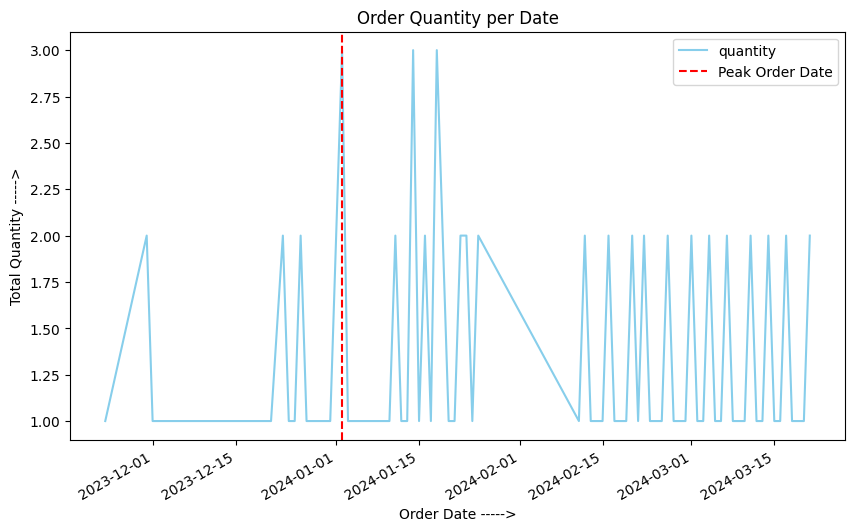

In [441]:
# Visualizing the data
plt.figure(figsize=(10, 6))
order_date_grouped.plot(kind='line', color='skyblue')
plt.title('Order Quantity per Date')
plt.xlabel('Order Date ----->')
plt.ylabel('Total Quantity ----->')
plt.axvline(x=peak_order_date, color='red', linestyle='--', label='Peak Order Date')
plt.legend()
plt.show()

Order Quantity Trend Over Time:

The line plot illustrates the trend in total order quantity over different dates.
Peak Order Date:

The red dashed vertical line indicates the peak order date, which is the date with the highest total order quantity.
X-axis Labels:

X-axis labels represent the different dates.
Y-axis Labels:

Y-axis labels represent the total order quantity on each date.
Peak Order Date Annotation:

The red dashed line is annotated as the 'Peak Order Date' in the legend.
Visualization Quality:

A line plot effectively displays the variation in order quantity over time, making it easy to identify peaks and trends.

In [375]:
# Merge dataframes to create a unified dataframe
merged_df = pd.merge(pd.merge(ord_df, cust_df, on='customer_id'), prod_df, on='product_id')

# Group by city and category, count the occurrences, and reset index
grouped_df = merged_df.groupby(['city', 'category']).size().reset_index(name='count')

# Pivot the table for better visualization
pivot_df = grouped_df.pivot(index='city', columns='category', values='count').fillna(0)
print(pivot_df)

category          Appliance  Electronics  Furniture  furniture
city                                                          
Kanagawa                8.0         11.0        5.0        1.0
Lake Buena Vista        4.0          7.0        2.0        2.0
Sydney                  5.0          7.0        2.0        0.0
Tokyo                  10.0          9.0        3.0        0.0


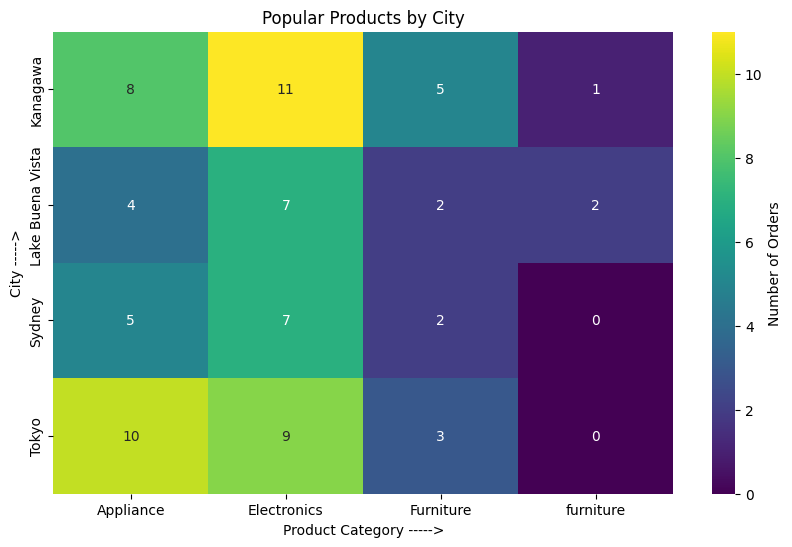

In [442]:
# Plotting the heatmap using seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_df, annot=True, fmt='g', cmap='viridis', cbar_kws={'label': 'Number of Orders'})
plt.xlabel('Product Category ----->')
plt.ylabel('City ----->')
plt.title('Popular Products by City')
plt.show()

Heatmap Visualization:

The heatmap visually represents the popularity of product categories in different cities.
Color Intensity:

Each cell in the heatmap is color-coded based on the number of orders. Darker colors indicate higher order counts, providing an immediate visual cue to popular product categories.
X-axis and Y-axis Labels:

X-axis represents the product categories, and Y-axis represents the cities.
Annotations:

Numerical values are annotated within each cell, indicating the number of orders for a specific product category in a given city.
Colorbar:

The colorbar on the side provides a reference for the number of orders corresponding to the color intensity.
Title:

The title 'Popular Products by City' gives context to the heatmap.

In [405]:
# Merge dataframes to create a combined dataframe
merged_df = pd.merge(ord_df, prod_df, on='product_id')
merged_df = pd.merge(merged_df, cust_df, on='customer_id')

# Calculate total sales for each product
product_sales = merged_df.groupby(['product_name','product_id'])['quantity'].sum().reset_index(name='total_quantity')

# Sort the products based on total sales in descending order
best_selling_products = product_sales.sort_values(by='total_quantity', ascending=False)

# Display the top N best-selling products (adjust N as needed)
top_n = 10
print(f"Top {top_n} Best-Selling Products:")
print(best_selling_products.head(top_n))

Top 10 Best-Selling Products:
      product_name product_id  total_quantity
26       Microwave       P110             4.0
8             Desk       P108             4.0
0     Air Purifier       P136             3.0
9        Desk Lamp       P119             3.0
36    Refrigerator       P114             3.0
39      Smartwatch       P125             3.0
42            Sofa       P115             3.0
45          Tablet       P109             3.0
49      Television       P111             3.0
51  Vacuum Cleaner       P117             3.0


C:\Users\Bandana\AppData\Local\Temp\ipykernel_19088\3324331398.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_quantity', y='product_name', data=best_selling_products.head(top_n),palette=colour_1b,edgecolor='black')


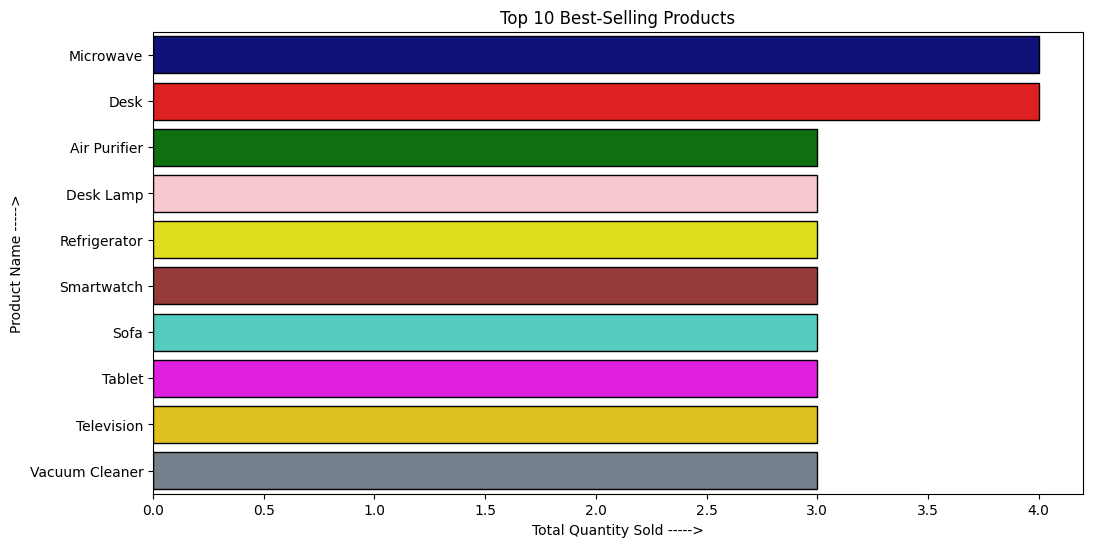

In [513]:
# Data visualization using seaborn
plt.figure(figsize=(12, 6))
colour_1b=['darkblue','red','green','pink','yellow','brown','turquoise','magenta','gold','slategray']
sns.barplot(x='total_quantity', y='product_name', data=best_selling_products.head(top_n),palette=colour_1b,edgecolor='black')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Total Quantity Sold ----->')
plt.ylabel('Product Name ----->')
plt.show()

Top Best-Selling Products:

The printed output displays the top N best-selling products, showcasing the product names and their corresponding total quantity sold.
Bar Plot Visualization:

The horizontal bar plot visually represents the total quantity sold for each of the top best-selling products.
Color Coding:

Different colors are used for each bar, enhancing visual distinction.
X-axis and Y-axis Labels:

The x-axis represents the total quantity sold, while the y-axis represents the product names.
Title:

The title 'Top 10 Best-Selling Products' provides context to the bar plot.

In [351]:
# Merge the dataframes to get the necessary information
merged_df = pd.merge(ord_df, prod_df, on='product_id')
merged_df = pd.merge(merged_df, cust_df, on='customer_id')

# Calculate total sales for each product
product_sales = merged_df.groupby('product_id').agg({'quantity': 'sum', 'product_name': 'first'}).reset_index()

# Sort products based on total sales in ascending order
slow_moving_products = product_sales.sort_values('quantity').head(10)

# Display the top 10 slow-moving products
print("Top 10 Slow-Moving Products:")
print(slow_moving_products[['product_id', 'product_name', 'quantity']])

Top 10 Slow-Moving Products:
   product_id    product_name  quantity
28       P133  Water Purifier       1.0
26       P131  Gaming Console       1.0
56       P161     Smart Scale       1.0
29       P134          Tablet       1.0
30       P135      Dishwasher       1.0
33       P138   Smart Speaker       1.0
34       P139         Monitor       1.0
35       P140  Digital Camera       1.0
37       P142  Microwave Oven       1.0
38       P143      Headphones       1.0


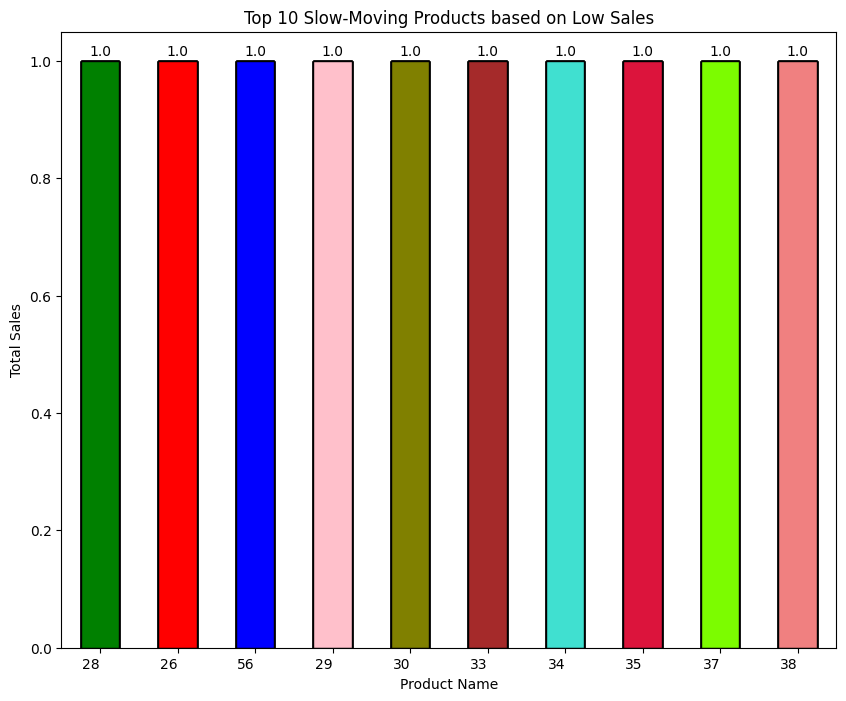

In [486]:
# Data Visualization
plt.figure(figsize=(10, 8))
color_1c=['green','crimson','darkslategrey','cyan','fuchsia','limegreen','indianred','royalblue','orange','olive']
plt.title('Top 10 Slow-Moving Products based on Low Sales')

# Annotate each bar with its value
for i, v in enumerate(slow_moving_products['quantity']):
    slow_moving_products['quantity'].plot(kind='bar', figsize=(10, 8), color=color_1d,edgecolor='black').text(i, v + 0.01, str(v), color='black', ha='center')

plt.xlabel('Product Name')
plt.ylabel('Total Sales')
plt.xticks(rotation=0, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

Top Slow-Moving Products:

The printed output displays the top 10 slow-moving products, showcasing the product names and their corresponding total sales.
Bar Plot Visualization:

The bar plot visually represents the total sales for each of the top slow-moving products.
Color Coding:

Different colors are used for each bar, enhancing visual distinction.
X-axis and Y-axis Labels:

The x-axis represents the product names, and the y-axis represents the total sales.
Title:

The title 'Top 10 Slow-Moving Products based on Low Sales' provides context to the bar plot.

In [376]:
# Find the index of the highest and lowest points
max_index = total_sales.idxmax()
min_index = total_sales.idxmin()

In [548]:
#Calculating the sum of total_price after groupby of order_date
total_sales = ord_df.groupby('order_date')['total_price'].sum()

#Printing the sum
print(total_sales)

order_date
2023-11-23      450.0
2023-11-30    21000.0
2023-12-01    15000.0
2023-12-08    20000.0
2023-12-15    55000.0
               ...   
2024-03-17     8000.0
2024-03-18     3000.0
2024-03-19     2500.0
2024-03-20     4000.0
2024-03-21     4000.0
Name: total_price, Length: 75, dtype: float64


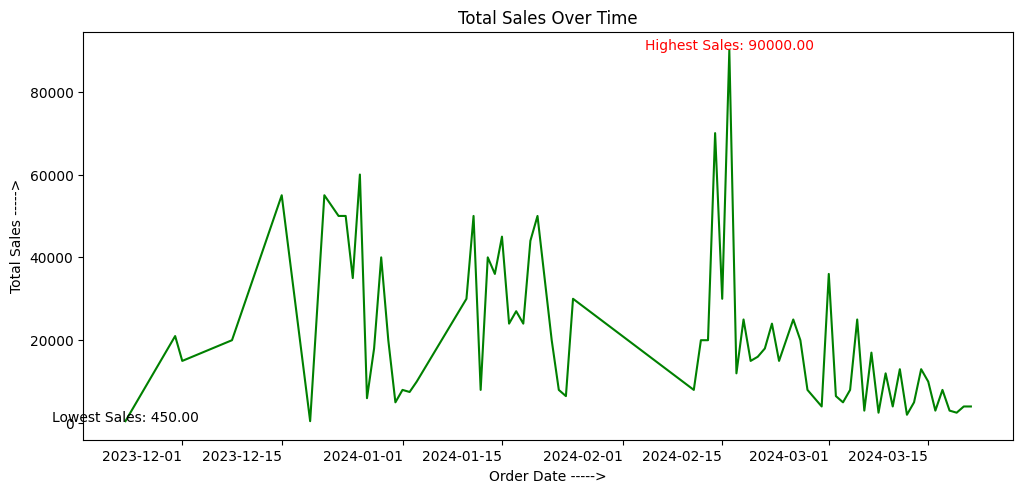

In [378]:
ax= total_sales.plot(kind='line', figsize=(12, 6), marker='', color='green')

# Annotate the highest point
ax.annotate(f'Highest Sales: {total_sales[max_index]:.2f}', xy=(max_index, total_sales[max_index]), xytext=(max_index, total_sales[max_index] + 100), 
            color='red', ha='center')

# Annotate the lowest point
ax.annotate(f'Lowest Sales: {total_sales[min_index]:.2f}', xy=(min_index, total_sales[min_index]), xytext=(min_index, total_sales[min_index] - 100),
            color='black', ha='center')

plt.title('Total Sales Over Time')
plt.xlabel('Order Date ----->')
plt.ylabel('Total Sales ----->')

# Rotate x-axis labels horizontally
plt.xticks(rotation=0)

plt.show()

Line Plot:

The line plot displays the trend of total sales over different order dates.
Annotations:

The code identifies and annotates the highest and lowest points on the plot.
Color Coding:

Different colors are used for annotations to distinguish between the highest (red) and lowest (black) sales.
X-axis and Y-axis Labels:

The x-axis represents the order dates, and the y-axis represents the total sales.
Title:

The title 'Total Sales Over Time' provides context to the line plot.

In [549]:
#Calculating the top 10 products according to the product_id
top_products = ord_df.groupby('product_id')['quantity'].sum().nlargest(10)

#Printing the output
print(top_products)

product_id
P108    4.0
P110    4.0
P102    3.0
P109    3.0
P111    3.0
P114    3.0
P115    3.0
P117    3.0
P119    3.0
P125    3.0
Name: quantity, dtype: float64


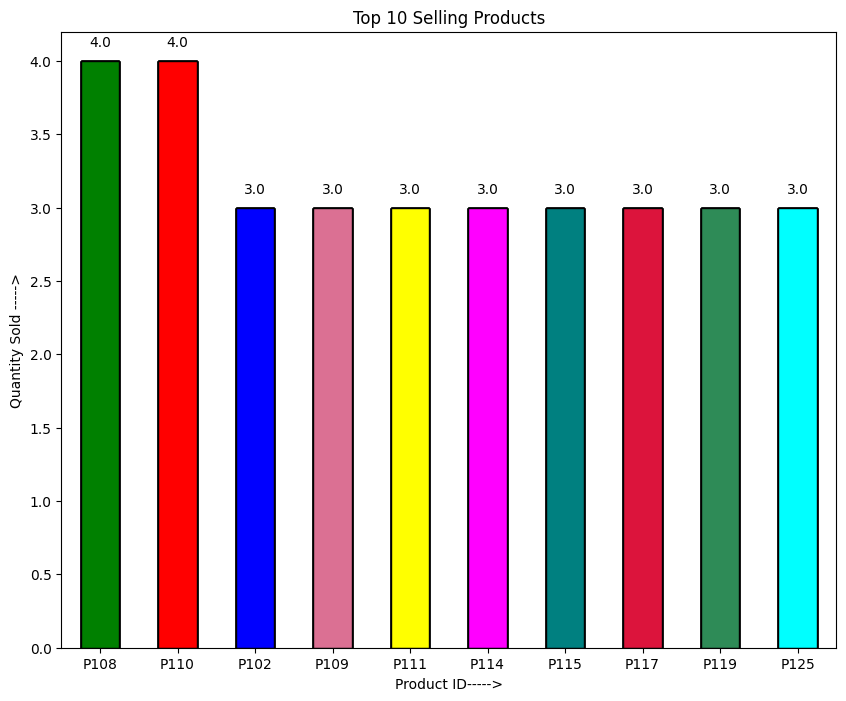

In [550]:
#Data Visualisation of Top 10 Selling Produtcs

#Assigning different colours to each product_id
colour=['green','red','blue','palevioletred','yellow','magenta','teal','crimson','seagreen','cyan']

# Annotate each bar with its value
for i, v in enumerate(top_products):
    top_products.plot(kind='bar', figsize=(10, 8), color=colour,edgecolor='black').text(i, v + 0.1, str(v), color='black', ha='center')

#Assigning the title, xlabel and ylabel to the plot
plt.title('Top 10 Selling Products')
plt.xlabel('Product ID----->')
plt.ylabel('Quantity Sold ----->')

# Rotate x-axis labels horizontally
plt.xticks(rotation=0)

#Displaying the plot
plt.show()

Top Selling Products:

The printed output displays the top 10 selling products, showcasing the product IDs and their corresponding total quantity sold.
Bar Plot Visualization:

The bar plot visually represents the total quantity sold for each of the top-selling products.
Color Coding:

Different colors are used for each bar, enhancing visual distinction.
X-axis and Y-axis Labels:

The x-axis represents the product IDs, and the y-axis represents the quantity sold.
Title:

The title 'Top 10 Selling Products' provides context to the bar plot.

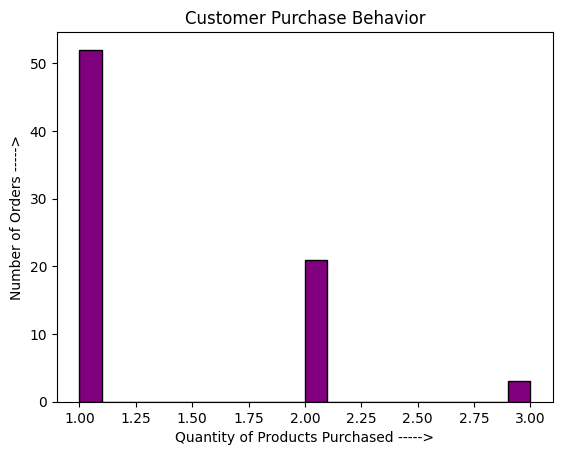

In [551]:
#Plotting the histogram of Customer Purchase Behaviour
plt.hist(ord_df['quantity'], bins=20, color='purple', edgecolor='black')
plt.title('Customer Purchase Behavior')
plt.xlabel('Quantity of Products Purchased ----->')
plt.ylabel('Number of Orders ----->')
plt.show()

Histogram Distribution:

The histogram illustrates the distribution of the quantity of products purchased across customer orders.
X-axis and Y-axis Labels:

The x-axis represents the quantity of products purchased, and the y-axis represents the number of orders with a specific quantity.
Title:

The title 'Customer Purchase Behavior' provides context to the histogram.
Bins:

The data is divided into 20 bins, each representing a range of quantities. This helps in visualizing the frequency distribution.

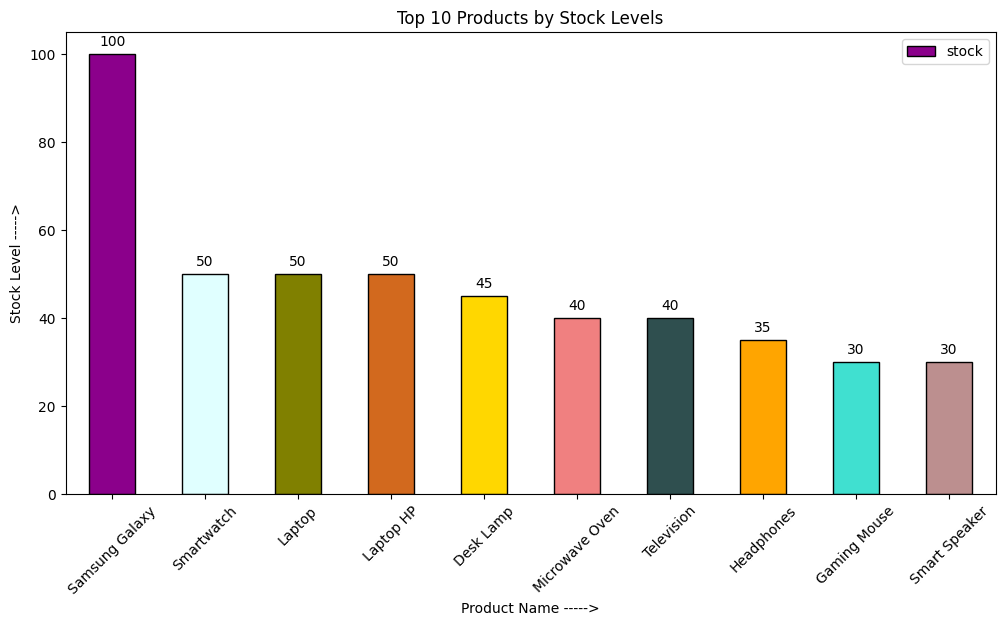

In [565]:
#Data Visualisation of Top 10 Products by Stock Levels
prod_df.sort_values('stock', ascending=False, inplace=True)

#Assigning dfferent colours to each product-id
colors=['darkmagenta','lightcyan','olive','chocolate','gold','lightcoral','darkslategray','orange','turquoise','rosybrown']
pr_df_h=prod_df.head(10).plot(x='product_name', y='stock', kind='bar', figsize=(12, 6), color=colors,edgecolor='black')

# Annotate each bar with its value
for i, v in enumerate(prod_df.head(10)['stock']):
    pr_df_h.text(i, v + 2, str(v), color='black', ha='center')

#Asssigning title, xlabel and ylabel to the plot
plt.title('Top 10 Products by Stock Levels')
plt.xlabel('Product Name ----->')
plt.ylabel('Stock Level ----->')

# Rotate x-axis labels horizontally
plt.xticks(rotation=45)

#Displaying the plot
plt.show()

Bar Plot:

The bar plot visualizes the stock levels of the top 10 products, ordered by descending stock quantity.
Color Coding:

Different colors are used for each bar, enhancing visual distinction between products.
X-axis and Y-axis Labels:

The x-axis represents the product IDs, and the y-axis represents the stock levels.
Title:

The title 'Top 10 Products by Stock Levels' provides context to thls, providing 

In [556]:
cust_df['email_domain'] = cust_df['email'].str.split('@').str[1]

#Calculating the counts of different email_domain of customers
email_domain_counts = cust_df['email_domain'].value_counts()

#Printing the output
print(email_domain_counts)

email_domain
gmail.com      40
example.com    13
mail.com        9
Name: count, dtype: int64


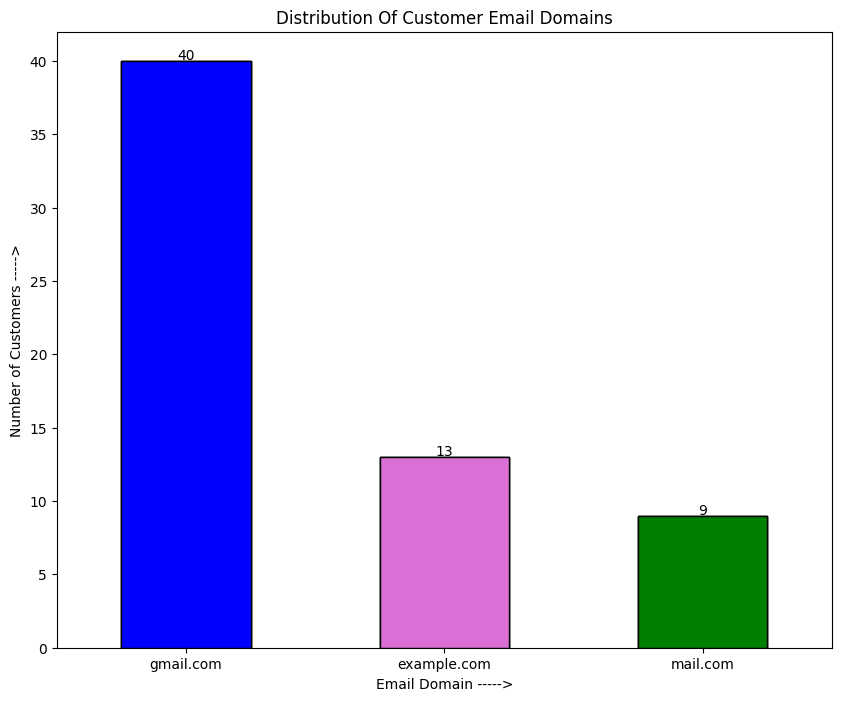

In [557]:
#Data Visualisation of Distribution Of Customer Email Domains plot

#Assigning different colours to each email_domain
colour=['blue','orchid','green']

# Annotate each bar with its value
for i, v in enumerate(email_domain_counts):
    email_domain_counts.plot(kind='bar', figsize=(10, 8), color=colour,edgecolor='black').text(i, v + 0.1, str(v), color='black', ha='center')

#Assgning title, xlabel and ylabel of the plot
plt.title('Distribution Of Customer Email Domains')
plt.xlabel('Email Domain ----->')
plt.ylabel('Number of Customers ----->')

# Rotate x-axis labels horizontally
plt.xticks(rotation=0)

#Displaying the plot
plt.show()

Bar Plot:

The bar plot visualizes the top 10 customer email domains based on the frequency of occurrences.
Color Coding:

Different colors are used for each bar, enhancing visual distinction between email domains.
X-axis and Y-axis Labels:

The x-axis represents the email domains, and the y-axis represents the number of customers associated with each domain.
Title:

The title 'Top 10 Customer Email Domains' provides context to they Insights:

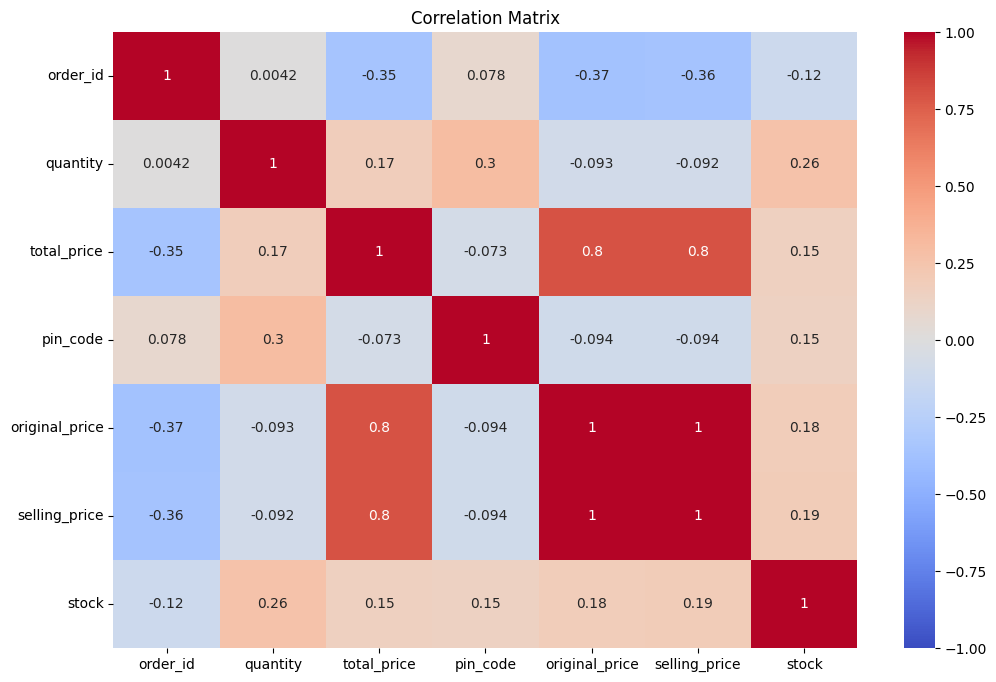

In [558]:
merged_df = ord_df.merge(cust_df, on='customer_id').merge(prod_df, on='product_id')

# Exclude non-numeric columns before calculating the correlation matrix
numeric_cols = merged_df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = merged_df[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

Heatmap:

The heatmap visualizes the correlation matrix of numeric columns in the merged dataframe.
Each cell in the heatmap represents the correlation coefficient between two numeric variables.
Positive correlations are indicated by warmer colors (closer to 1), while negative correlations are indicated by cooler colors (closer to -1).
Color Legend:

The color legend on the side of the heatmap helps interpret the correlation coefficients.

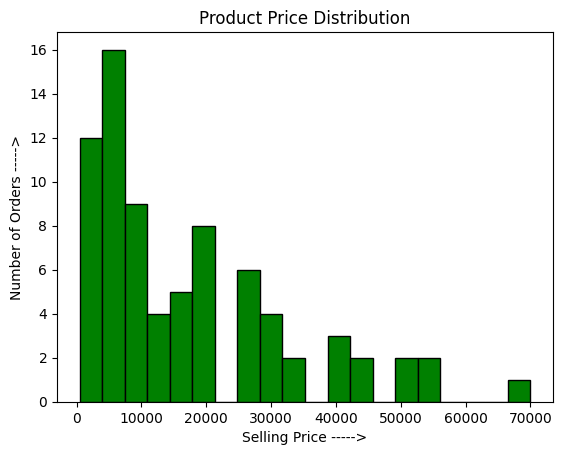

In [204]:
# Combine relevant columns from different dataframes
merged_df = ord_df.merge(prod_df, on='product_id')

# Plot histogram
plt.hist(merged_df['selling_price'], bins=20, color='green', edgecolor='black')
plt.title('Product Price Distribution')
plt.xlabel('Selling Price ----->')
plt.ylabel('Number of Orders ----->')
plt.show()

<h3>Histogram:</h3><ol>
<li>
The histogram provides a visual representation of the distribution of selling prices for product</li>s<li>.
The x-axis represents the selling prices, and the y-axis represents the number of orders or occurrences within each price ran</li>
</ol>g<h3>e.
Bin Co</h3>u<ol>n<li>t:

The histogram is divided into 20 bins, each representing a range of selling p</li>r<li>ices.
Adjusting the number of bins can provide different levels of granularity in understanding the distri</li>
</ol>b<h3>ution.
C</h3>o<ol>l<li>oring:

The histogram bars are colored in green, enhancing v</li>
</ol>isibility.

In [383]:
# Find the index of the highest and lowest pin_code values
max_index = cust_df['pin_code'].idxmax()
min_index = cust_df['pin_code'].idxmin()

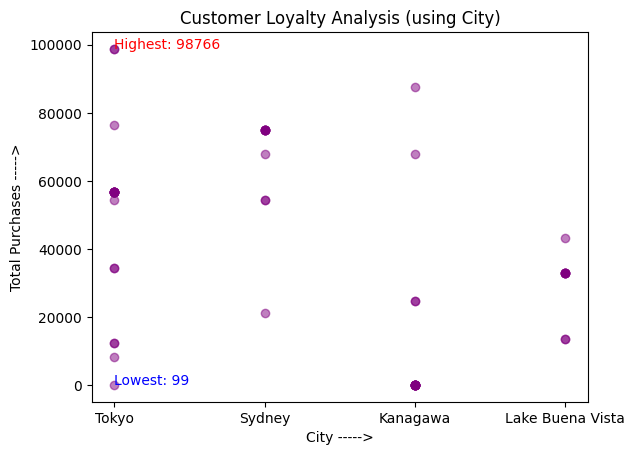

In [384]:
plt.scatter(cust_df['city'], cust_df['pin_code'], color='purple', alpha=0.5)

# Annotate the highest point
plt.annotate(f'Highest: {cust_df.at[max_index, "pin_code"]}', xy=(cust_df.at[max_index, 'city'], cust_df.at[max_index, 'pin_code']), 
             xytext=(cust_df.at[max_index, 'city'], cust_df.at[max_index, 'pin_code'] + 100), color='red', ha='left')

# Annotate the lowest point
plt.annotate(f'Lowest: {cust_df.at[min_index, "pin_code"]}', xy=(cust_df.at[min_index, 'city'], cust_df.at[min_index, 'pin_code']), 
            xytext=(cust_df.at[min_index, 'city'], cust_df.at[min_index, 'pin_code'] - 100), color='blue', ha='left')

plt.title('Customer Loyalty Analysis (using City)')
plt.xlabel('City ----->')
plt.ylabel('Total Purchases ----->')
plt.show()

Scatter Plot:

The scatter plot displays the relationship between cities and corresponding pin codes for customers.
Each point represents a city and its associated pin code.
Coloring:

The points are colored in purple to distinguish them in the plot.
Annotations:

Annotations indicate the highest and lowest pin codes, providing insights into extreme values.

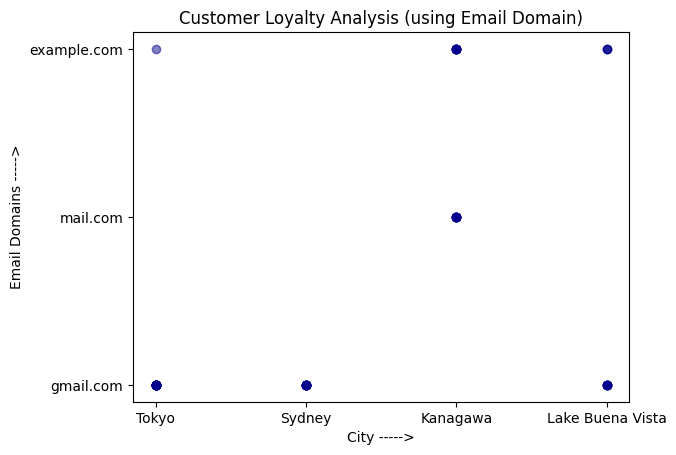

In [267]:
plt.scatter(cust_df['city'], cust_df['email_domain'], color='darkblue', alpha=0.5)
plt.title('Customer Loyalty Analysis (using Email Domain)')
plt.xlabel('City ----->')
plt.ylabel('Email Domains ----->')
plt.show()

Scatter Plot:

The scatter plot displays the relationship between cities and email domains for customers.
Each point represents a city and its associated email domain.
Coloring:

The points are colored in dark blue to distinguish them in the plot.

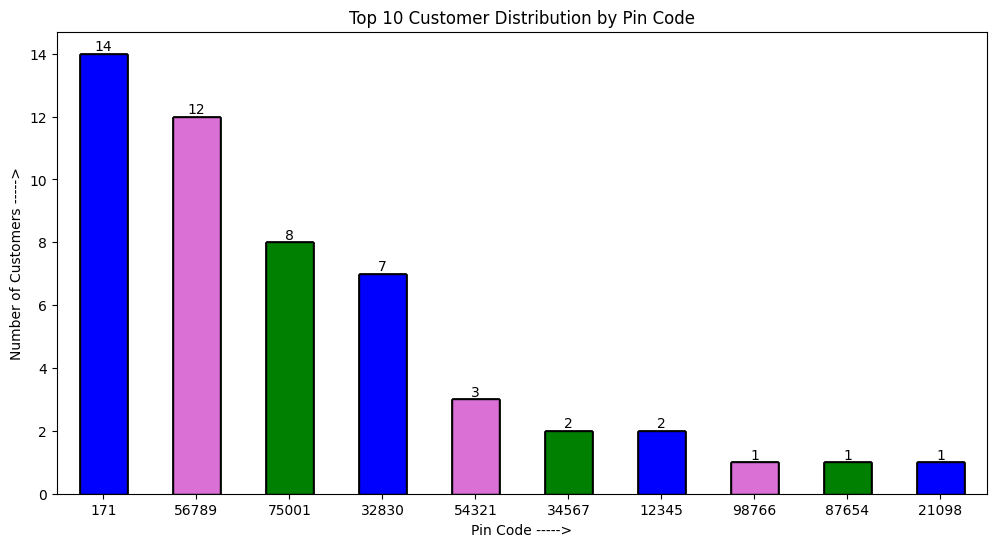

In [559]:
colours=['blue','hotpink','green','aqua','darkmagenta','goldenrod','forestgreen','tomato','indigo','cyan']

# Annotate each bar with its value
for i, v in enumerate(pin_code_counts):
    pin_code_counts.plot(kind='bar', figsize=(12, 6), color=colour,edgecolor='black').text(i, v + 0.1, str(v), color='black', ha='center')

plt.title('Top 10 Customer Distribution by Pin Code')
plt.xlabel('Pin Code ----->')
plt.ylabel('Number of Customers ----->')

# Rotate x-axis labels horizontally
plt.xticks(rotation=0)

plt.show()

Top 10 Pin Codes:

The bar plot displays the distribution of customers based on the top 10 pin codes with the highest customer count.
Coloring:

Each bar is colored with distinct colors (blue, hot pink, green, etc.) for better visibility and differentiation.

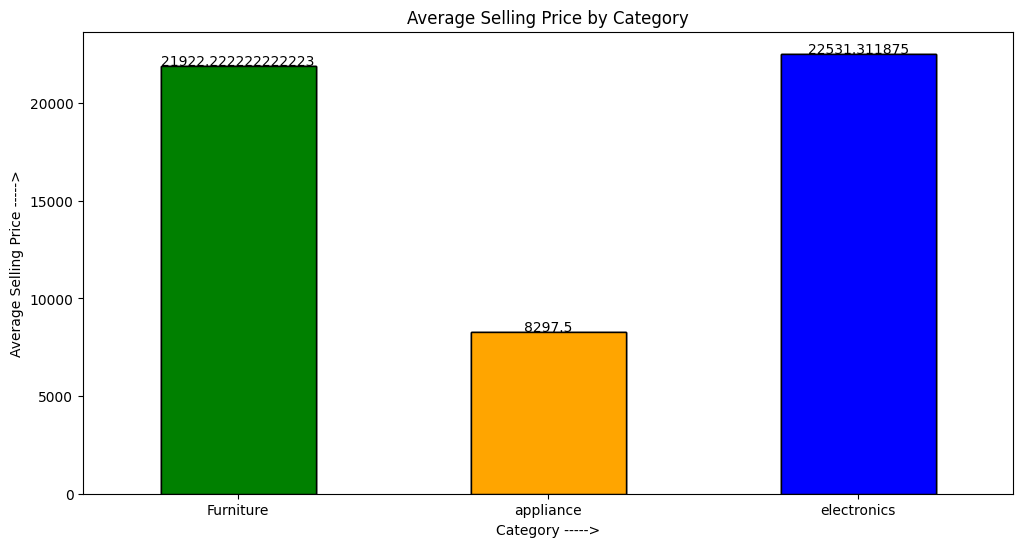

In [575]:
avg_selling_price = prod_df.groupby('category')['selling_price'].mean()
color_c=['green','orange','blue']

# Annotate each bar with its value
for i, v in enumerate(avg_selling_price):
    avg_selling_price.plot(kind='bar', figsize=(12, 6), color=color_c,edgecolor='black').text(i, v + 0.1, str(v), color='black', ha='center')

plt.title('Average Selling Price by Category')
plt.xlabel('Category ----->')
plt.ylabel('Average Selling Price ----->')

# Rotate x-axis labels horizontally
plt.xticks(rotation=0)

plt.show()

Category-wise Average Selling Price:

The bar plot displays the average selling price for each product category.
Coloring:

Each bar is colored with distinct colors (green, orange, blue, crimson) for better visibility and differentiation between categories.

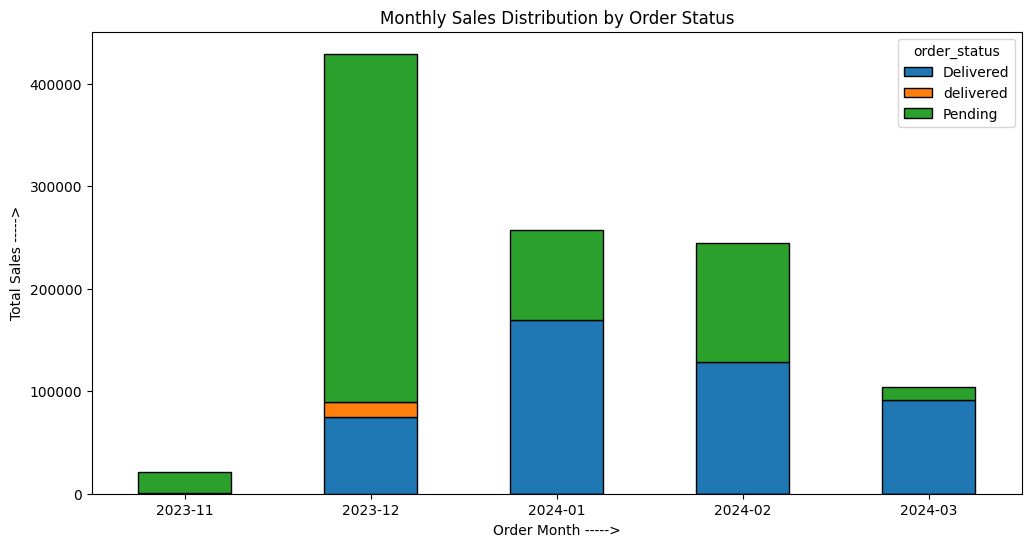

In [578]:
#Calculating the order month
ord_df['order_month'] = ord_df['order_date'].dt.to_period('M')

#Groupby the monthly_sales
monthly_sales = ord_df.groupby(['order_month', 'order_status'])['total_price'].sum().unstack()

# Filter only the desired order statuses
desired_statuses = ['Delivered', 'delivered', 'Pending']
monthly_sales = monthly_sales[desired_statuses]

#Data Visualisatioon for Monthly Sales Distribution by Order Status
monthly_sales.plot(kind='bar', stacked=True, figsize=(12, 6),edgecolor='black')

#Assigning title, xlabel and ylabel for the plot
plt.title('Monthly Sales Distribution by Order Status')
plt.xlabel('Order Month ----->')
plt.ylabel('Total Sales ----->')

# Rotate x-axis labels horizontally
plt.xticks(rotation=0)

#displaying the plot
plt.show()

<h3>Monthly Sales Distribution:</h3>
1. 
The stacked bar plot illustrates the total sales distribution for each month, segmented by order status (e.g., completed, pendied)<br><h3>.
Color Segmentati</h3>on1. :

Each segment in a bar represents a different order status, and the colors help distinguish between t<br><h3>hem.
Stacked Represent</h3>at1. ion:

The stacked bars allow for a visual comparison of the contribution of each order status to the total monthly sales.

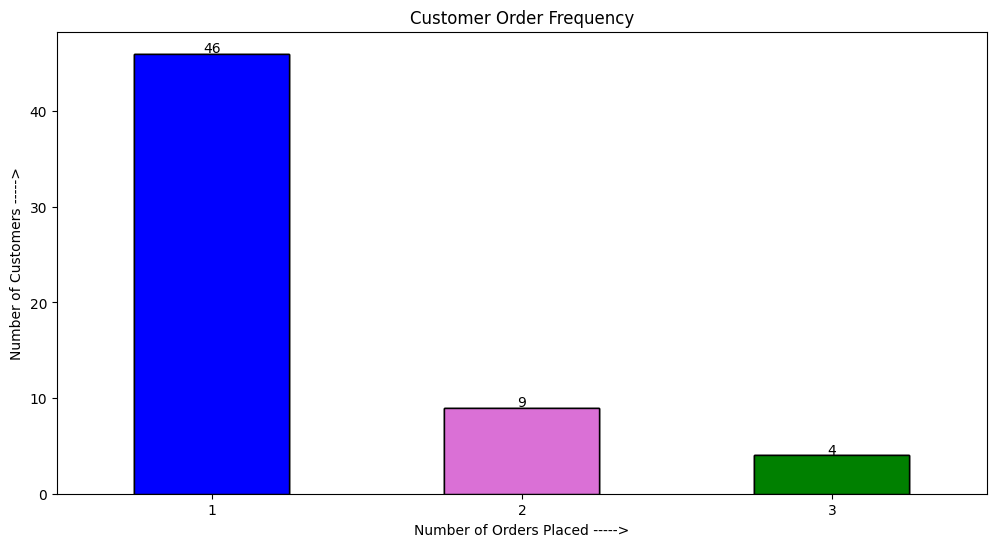

In [233]:
order_frequency = ord_df.groupby('customer_id')['order_id'].count().value_counts()
colors=['blue','brown','green']

# Annotate each bar with its value
for i, v in enumerate(order_frequency):
    order_frequency.plot(kind='bar', figsize=(12, 6), color=colour,edgecolor='black').text(i, v + 0.1, str(v), color='black', ha='center')
    
plt.title('Customer Order Frequency')
plt.xlabel('Number of Orders Placed ----->')
plt.ylabel('Number of Customers ----->')

# Rotate x-axis labels horizontally
plt.xticks(rotation=0)

plt.show()

Order Frequency Distribution:

The bar plot illustrates the distribution of customer order frequencies, showing the number of customers for each distinct order frequency.
Color Segmentation:

Each bar represents a different order frequency category, and the colors help distinguish between them.

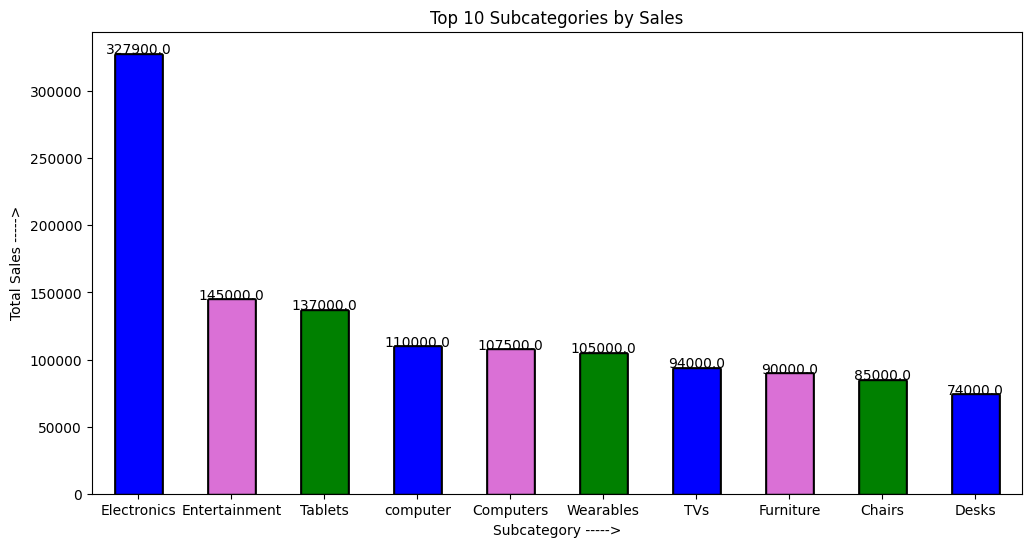

In [234]:
subcategory_sales = ord_df.merge(prod_df[['product_id', 'sub_category']], on='product_id')
subcategory_sales = subcategory_sales.groupby('sub_category')['total_price'].sum().nlargest(10)
colours=['green','orange','blue','pink','teal','crimson','aqua','magenta','darkslategrey','gold']

# Annotate each bar with its value
for i, v in enumerate(subcategory_sales):
    subcategory_sales.plot(kind='bar', figsize=(12, 6), color=colour,edgecolor='black').text(i, v + 0.1, str(v), color='black', ha='center')
    
plt.title('Top 10 Subcategories by Sales')
plt.xlabel('Subcategory ----->')
plt.ylabel('Total Sales ----->')

# Rotate x-axis labels horizontally
plt.xticks(rotation=0)

plt.show()

<h3>Top Subcategories by Sales:</h3>

The bar plot highlights the top 10 subcategories based on total sales, providing insights into the most lucrative product categories<br><h3>.
Color Segmentati<br></h3>on<br>:

Each bar represents a different subcategory, and the colors enhance the visual appeal while distinguishing between subcategories.

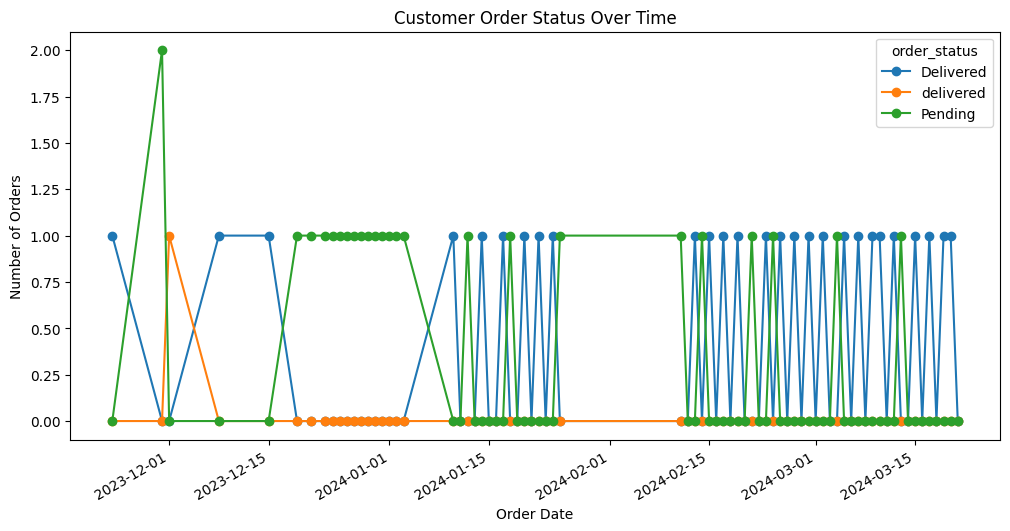

In [576]:
#Groupby the order_status_over_time
order_status_over_time = ord_df.groupby(['order_date', 'order_status'])['order_id'].count().unstack().fillna(0)

# Filter only the desired order statuses
desired_statuses = ['Delivered', 'delivered', 'Pending']
order_status_over_time = order_status_over_time[desired_statuses]

#Data Visualisation for Customer Order Status Over Time
order_status_over_time.plot(kind='line', figsize=(12, 6), marker='o')
plt.title('Customer Order Status Over Time')
plt.xlabel('Order Date')
plt.ylabel('Number of Orders')
plt.show()

<h3>Order Status Variation Over Time:</h3>

The line plot illustrates how the different order statuses (e.g., 'Delivered,' 'Shipped,' 'Cancelled') vary over time.
<br><h3>Trends and Patterns:</h3>

Trends and patterns in the order statuses can be observed, providing insights into the efficiency of order processing and fulfillment operations.
<br><h3>Order Volume Fluctuations:</h3>

Peaks and troughs in the lines represent fluctuations in order volume for each order status on different dates.

**CONCLUSION:**
<br>Following are the conclusions drawn from this ***Ecommerce Data Analysis*** Project:
<br><h4>Customer Insights:</h4>

1. The top-performing customers have been identified, allowing for targeted engagement and personalized marketing strategies.
1. Customer demographics have been explored, with a focus on city-wise distribution, providing valuable insights for regional marketing efforts.
<br><h4>Product Performance:</h4>

1. Best-selling products and high-performing categories have been pinpointed, guiding inventory management and marketing priorities.
1. Pricing strategies have been evaluated, ensuring that products with optimal profit margins are highlighted.
<br><h4>Order Dynamics:</h4>

1. Trends in order patterns over time have been analyzed, offering insights into peak sales periods and allowing for strategic resource allocation.
1. Payment modes and order statuses have been scrutinized, contributing to a streamlined and efficient order fulfillment process.
<br><h4>Customer-Product Relationships:</h4>

1. Association analysis has revealed products frequently purchased together, enabling targeted bundling or cross-selling strategies.
<br><h4>Geographical Considerations:</h4>

1. Geographic distribution of customers and orders has been visualized, aiding in the identification of key regions for market expansion or targeted marketing efforts.
<br><h4>Customer Retention and Loyalty:</h4>

1. Repeat customer analysis has been conducted, providing a foundation for customer retention strategies.
1. Factors contributing to customer loyalty have been explored, fostering a customer-centric approach.